# Heart Disease Analysis

by Mochamad Derisman Nugraha
from Public Health dataset ( https://www.kaggle.com/ronitf/heart-disease-uci or https://archive.ics.uci.edu/ml/datasets/Heart+Disease )

*Heart disease, otherwise known as cardiovascular disease, covers a wide range of conditions that affect the heart and has been the leading cause of death worldwide over the past few decades. This relates to the many risk factors for heart disease and the need for time to obtain an accurate, reliable and reasonable approach to making an early diagnosis to achieve rapid disease management. Data mining is a commonly used technique for processing very large data in the healthcare domain. The researchers applied several data mining and machine learning techniques to analyze huge complex medical data, helping healthcare professionals to predict heart disease.*

***Context***

• age: The person’s age in years

• sex: The person’s sex (1 = male, 0 = female)

• cp: chest pain type

— Value 0: asymptomatic

— Value 1: atypical angina

— Value 2: non-anginal pain

— Value 3: typical angina

• trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

• chol: The person’s cholesterol measurement in mg/dl

• fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

• restecg: resting electrocardiographic results

— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

•thalach: The person’s maximum heart rate achieved

•exang: Exercise induced angina (1 = yes; 0 = no)

•oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

•slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

•ca: The number of major vessels (0–3)

•thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

— Value 1: fixed defect (no blood flow in some part of the heart)

— Value 2: normal blood flow

— Value 3: reversible defect (a blood flow is observed but it is not normal)

•target: Heart disease (1 = no, 0= yes)

Source: https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

## Import Module & Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
%timeit

In [2]:
heart = pd.read_csv('heart.csv')

## Describe Data

In [3]:
heart.info()
heart.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

In [4]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# Checking null value for any kind columns
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***the dataframe has no null values*** 

In [6]:
# Checking value counts for any kind columns
for col in heart.columns:
    if heart[col].dtype == 'int' or heart[col].dtype == 'int64' or heart[col].dtype == 'float64':
        print(col,":",heart[col].nunique())

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


In [7]:
# Renaming all the columns of the dataset to convenient and understandable names

heart.columns = ['age', 'sex', 'chest_pain', 'trestbps', 
              'cholesterol', 'fbs', 'rest_ecg', 'thalach', 
              'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'target']

#Changing cateogorcial data to 'string' type categorical data

heart['sex'][heart['sex'] == 0] = 'female'
heart['sex'][heart['sex'] == 1] = 'male'

heart['chest_pain'][heart['chest_pain'] == 0] = 'typical angina'
heart['chest_pain'][heart['chest_pain'] == 1] = 'atypical angina'
heart['chest_pain'][heart['chest_pain'] == 2] = 'non-anginal pain'
heart['chest_pain'][heart['chest_pain'] == 3] = 'asymptomatic'

heart['fbs'][heart['fbs'] == 0] = 'low'
heart['fbs'][heart['fbs'] == 1] = 'high'

heart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'
heart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart['exang'][heart['exang'] == 0] = 'no'
heart['exang'][heart['exang'] == 1] = 'yes'

heart['slope'][heart['slope'] == 0] = 'upsloping'
heart['slope'][heart['slope'] == 1] = 'flat'
heart['slope'][heart['slope'] == 2] = 'downsloping'

heart['thal'][heart['thal'] == 0] = 'null'
heart['thal'][heart['thal'] == 1] = 'normal'
heart['thal'][heart['thal'] == 2] = 'fixed defect'
heart['thal'][heart['thal'] == 3] = 'reversable defect'

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    object 
 2   chest_pain   303 non-null    object 
 3   trestbps     303 non-null    int64  
 4   cholesterol  303 non-null    int64  
 5   fbs          303 non-null    object 
 6   rest_ecg     303 non-null    object 
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    object 
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    object 
 11  ca           303 non-null    int64  
 12  thal         303 non-null    object 
 13  target       303 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


In [9]:
heart.head()

age     sex        chest_pain  trestbps  cholesterol   fbs  \
0   63    male      asymptomatic       145          233  high   
1   37    male  non-anginal pain       130          250   low   
2   41  female   atypical angina       130          204   low   
3   56    male   atypical angina       120          236   low   
4   57  female    typical angina       120          354   low   

                rest_ecg  thalach exang  oldpeak        slope  ca  \
0                 normal      150    no      2.3    upsloping   0   
1  ST-T wave abnormality      187    no      3.5    upsloping   0   
2                 normal      172    no      1.4  downsloping   0   
3  ST-T wave abnormality      178    no      0.8  downsloping   0   
4  ST-T wave abnormality      163   yes      0.6  downsloping   0   

           thal  target  
0        normal       1  
1  fixed defect       1  
2  fixed defect       1  
3  fixed defect       1  
4  fixed defect       1

### Data Stats

#### Describe Statistics

In [10]:
# Checking description of numerical columns
heart.describe().T

count        mean        std    min    25%    50%    75%    max
age          303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trestbps     303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
cholesterol  303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalach      303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak      303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
ca           303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
target       303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [11]:
data_num = heart.select_dtypes(include=['int64', 'float64'])
data_cat = heart.select_dtypes(include=['object'])
data_num.columns,data_cat.columns 

(Index(['age', 'trestbps', 'cholesterol', 'thalach', 'oldpeak', 'ca', 'target'], dtype='object'),
 Index(['sex', 'chest_pain', 'fbs', 'rest_ecg', 'exang', 'slope', 'thal'], dtype='object'))

In [12]:
data_num.describe().T

count        mean        std    min    25%    50%    75%    max
age          303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trestbps     303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
cholesterol  303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalach      303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak      303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
ca           303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
target       303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

#### Mode

In [13]:
data_num.mode().iloc[0].reset_index(name= 'Mode')

index   Mode
0          age   58.0
1     trestbps  120.0
2  cholesterol  197.0
3      thalach  162.0
4      oldpeak    0.0
5           ca    0.0
6       target    1.0

In [14]:
data_cat.mode().iloc[0].reset_index(name= 'Mode')

index                   Mode
0         sex                   male
1  chest_pain         typical angina
2         fbs                    low
3    rest_ecg  ST-T wave abnormality
4       exang                     no
5       slope            downsloping
6        thal           fixed defect

#### Variance

In [15]:
data_num.var()

age              82.484558
trestbps        307.586453
cholesterol    2686.426748
thalach         524.646406
oldpeak           1.348095
ca                1.045724
target            0.248836
dtype: float64

#### Standard Deviation

In [16]:
np.sqrt(data_num.var())

age             9.082101
trestbps       17.538143
cholesterol    51.830751
thalach        22.905161
oldpeak         1.161075
ca              1.022606
target          0.498835
dtype: float64

#### InterQuartileRange (IQR)

In [17]:
print('Inter Quartile Range (IQR):')
data_num.quantile(0.75)-data_num.quantile(0.25)

Inter Quartile Range (IQR):


age            13.5
trestbps       20.0
cholesterol    63.5
thalach        32.5
oldpeak         1.6
ca              1.0
target          1.0
dtype: float64

In [18]:
#categorical data object
data_cat.describe(include = 'object')

sex      chest_pain  fbs               rest_ecg exang        slope  \
count    303             303  303                    303   303          303   
unique     2               4    2                      3     2            3   
top     male  typical angina  low  ST-T wave abnormality    no  downsloping   
freq     207             143  258                    152   204          142   

                thal  
count            303  
unique             4  
top     fixed defect  
freq             166

#### Probability

The Slovin's Formula for determining the sample size for a survey research,to use and the computation is based almost solely on the population size. The Slovin's Formula is given as follows: n = N/(1+Ne2), where n is the sample size, N is the population size and e is the margin of error to be decided by the researcher. However, its misuse is now also a popular subject of research here in my country and students are usually discourage to use the formula even though the reasons behind are not clear enough to them. Perhaps it will helpful if we could know who really is Slovin and what were the bases of his formula

In [19]:
N1 = 1025
e1 = 0.05

In [20]:
slovin = N1/(1+N1 * e1**2)
print('probability value =',slovin)

probability value = 287.719298245614


In [21]:
(slovin/303)

0.9495686410746338

----------------

------

## EDA

### Numerical Data

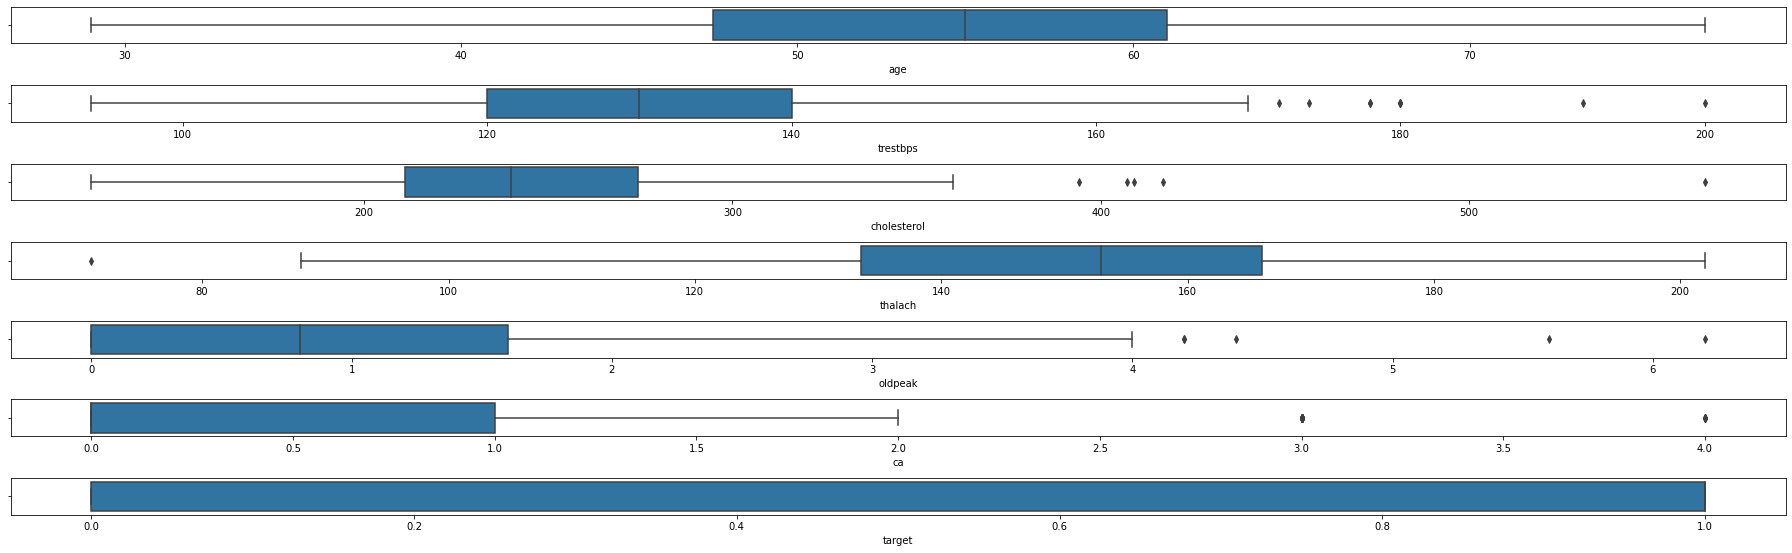

In [22]:
plt.figure(figsize=(25, 15))
for i in range(0, len(data_num.columns)):
    plt.subplot(14, 1, i+1)
    sns.boxplot(data_num[data_num.columns[i]],orient='v')
    plt.tight_layout()

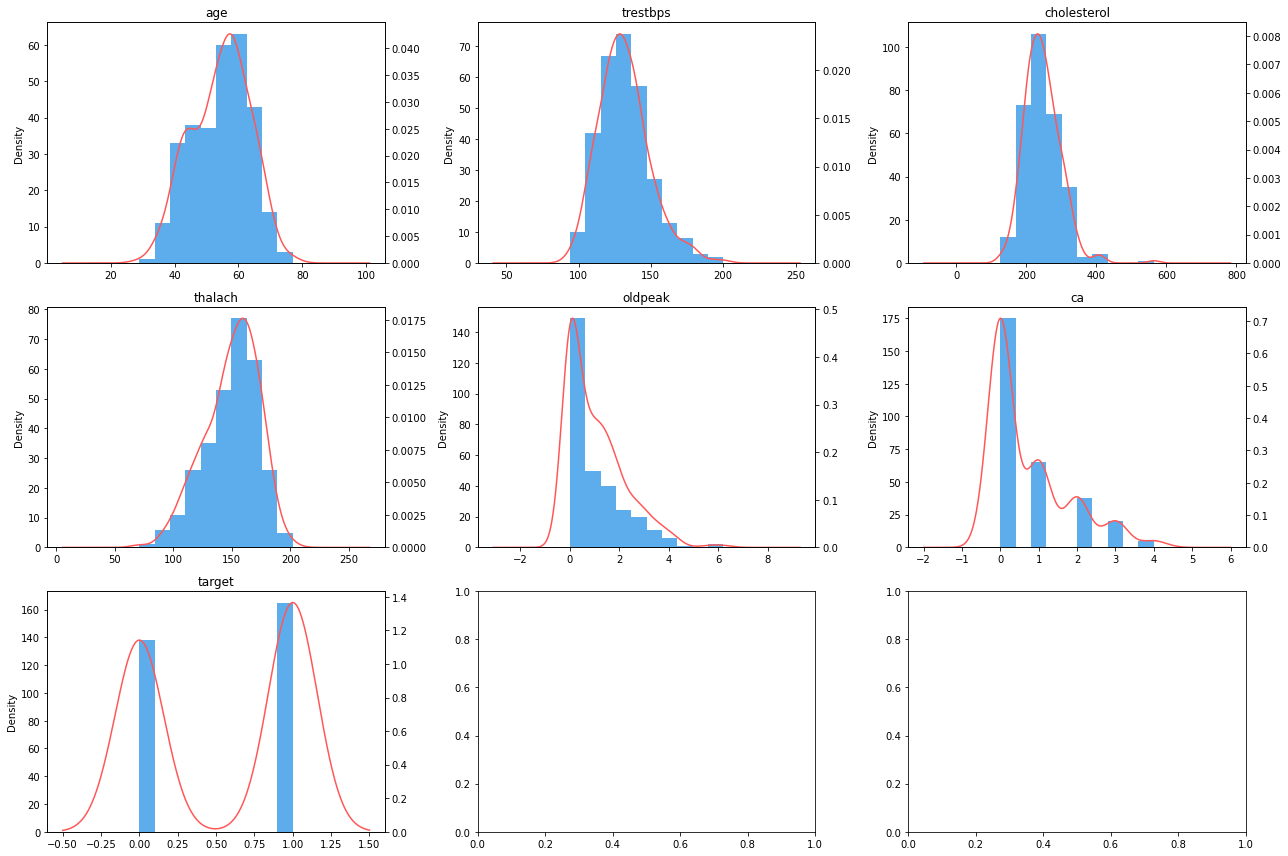

In [23]:
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 6, m * 4))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#5dadec')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='#ff5757')
    ax2.set_ylim(0)

fig.tight_layout()

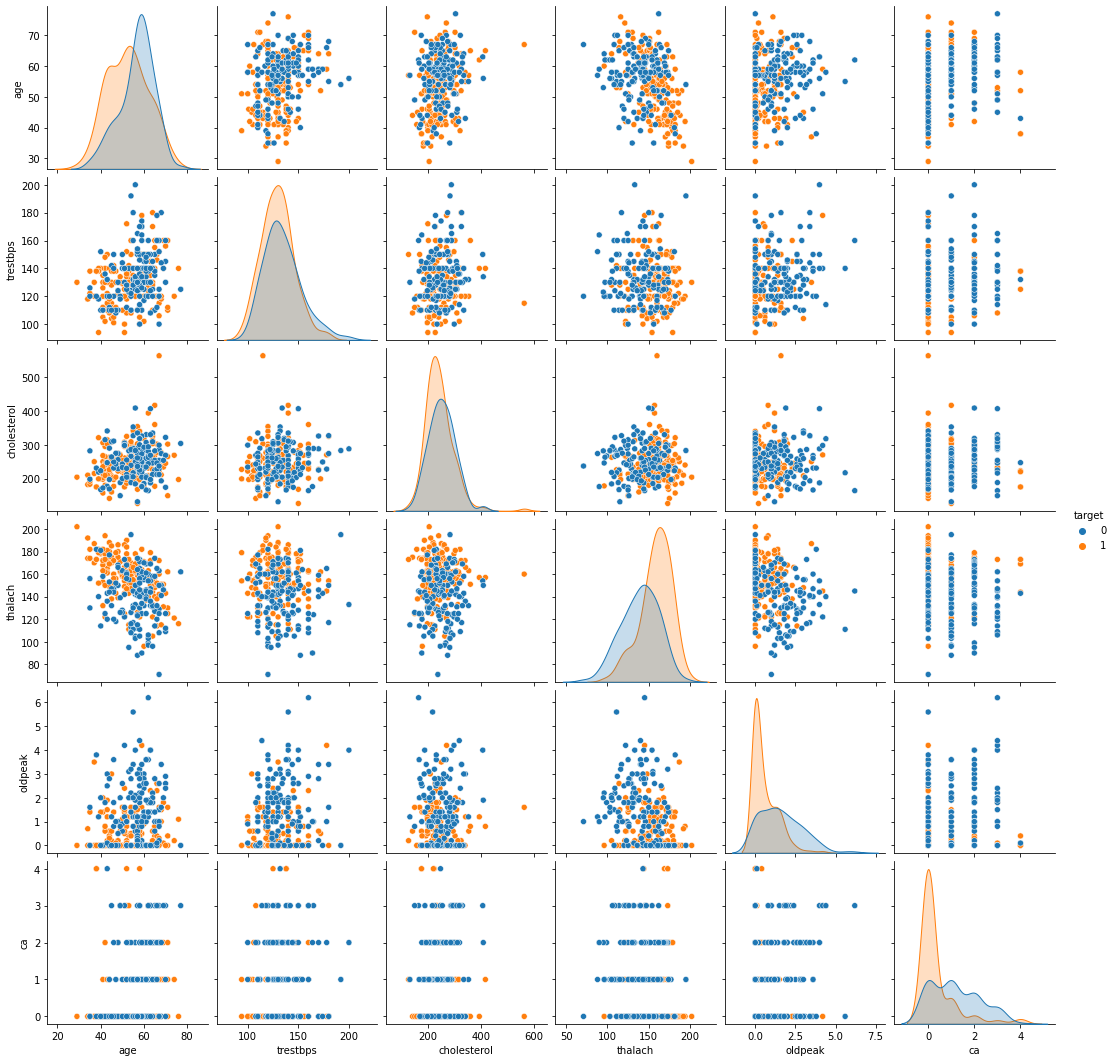

In [24]:
sns.pairplot(heart, hue='target')

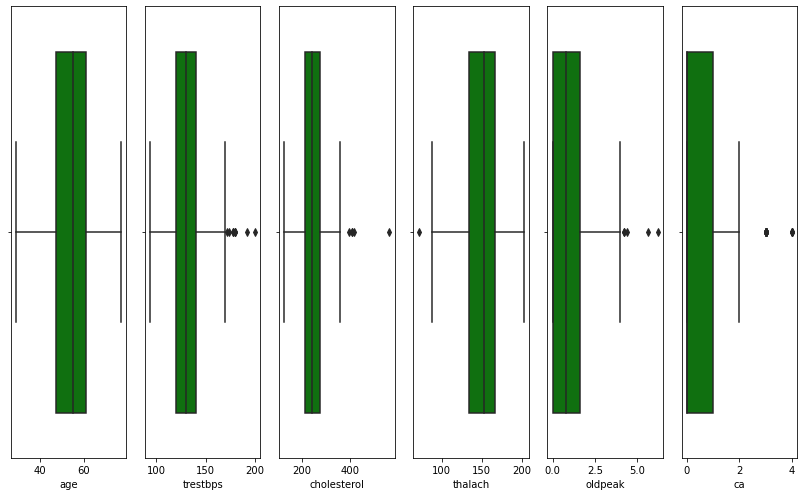

In [25]:
features_numeric = ['age', 'trestbps', 'cholesterol', 'thalach', 'oldpeak', 'ca']
plt.figure(figsize=(15,7))
for i in range(0, len(features_numeric)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(data_num[features_numeric[i]],color='green',orient='h')
    plt.tight_layout()

• Resting blood pressure, Cholesterol, Max Heart Rate, ST Depression, Num Major Vessel had a Outliers

<AxesSubplot:>

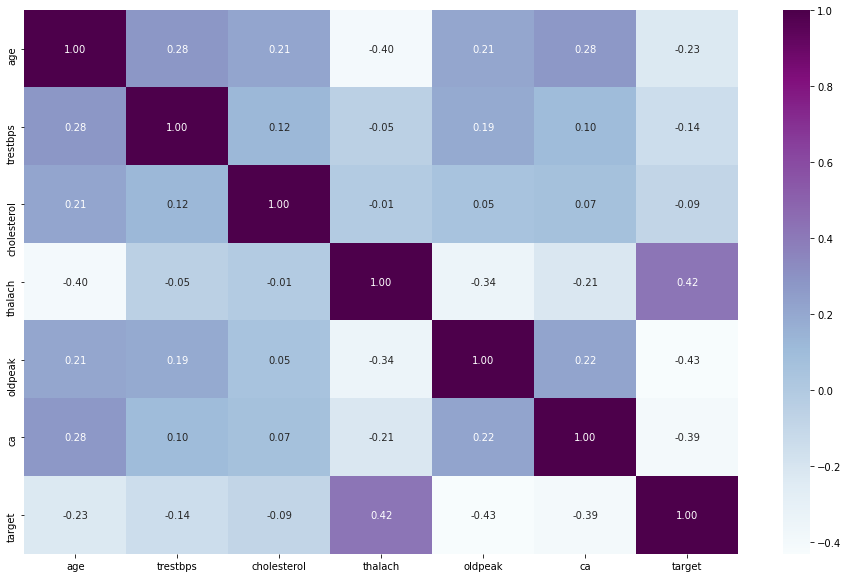

In [26]:
corr_= heart[data_num.columns].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

- thalach had influence on target
- age had influence on trestbps ,cholesterol, oldpeak ,and ca ( Major Blood Vessel) category
- ca (Major Blood Vessel) had influence oldpeak

### Categorical Data

In [27]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

feature  unique value
1  chest_pain             4
6        thal             4
3    rest_ecg             3
5       slope             3
0         sex             2
2         fbs             2
4       exang             2

<AxesSubplot:>

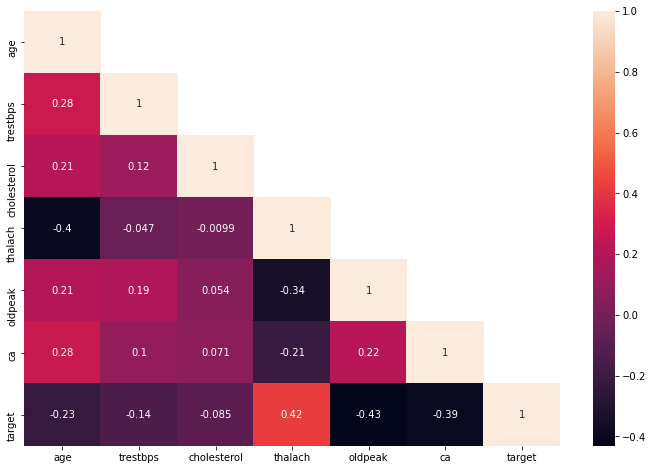

In [28]:
# Pearson Correlation
plt.figure(figsize=(12,8))
sns.heatmap(heart.corr(),annot=True,mask=np.triu(heart.corr(),+1))

- Age had strong correlation with trestbps and CA
- Oldpeak had strong Correlation with CA (Major Blood Vessels)
- Target had strong correlation with thalach (Max Heart Rate Achieved)

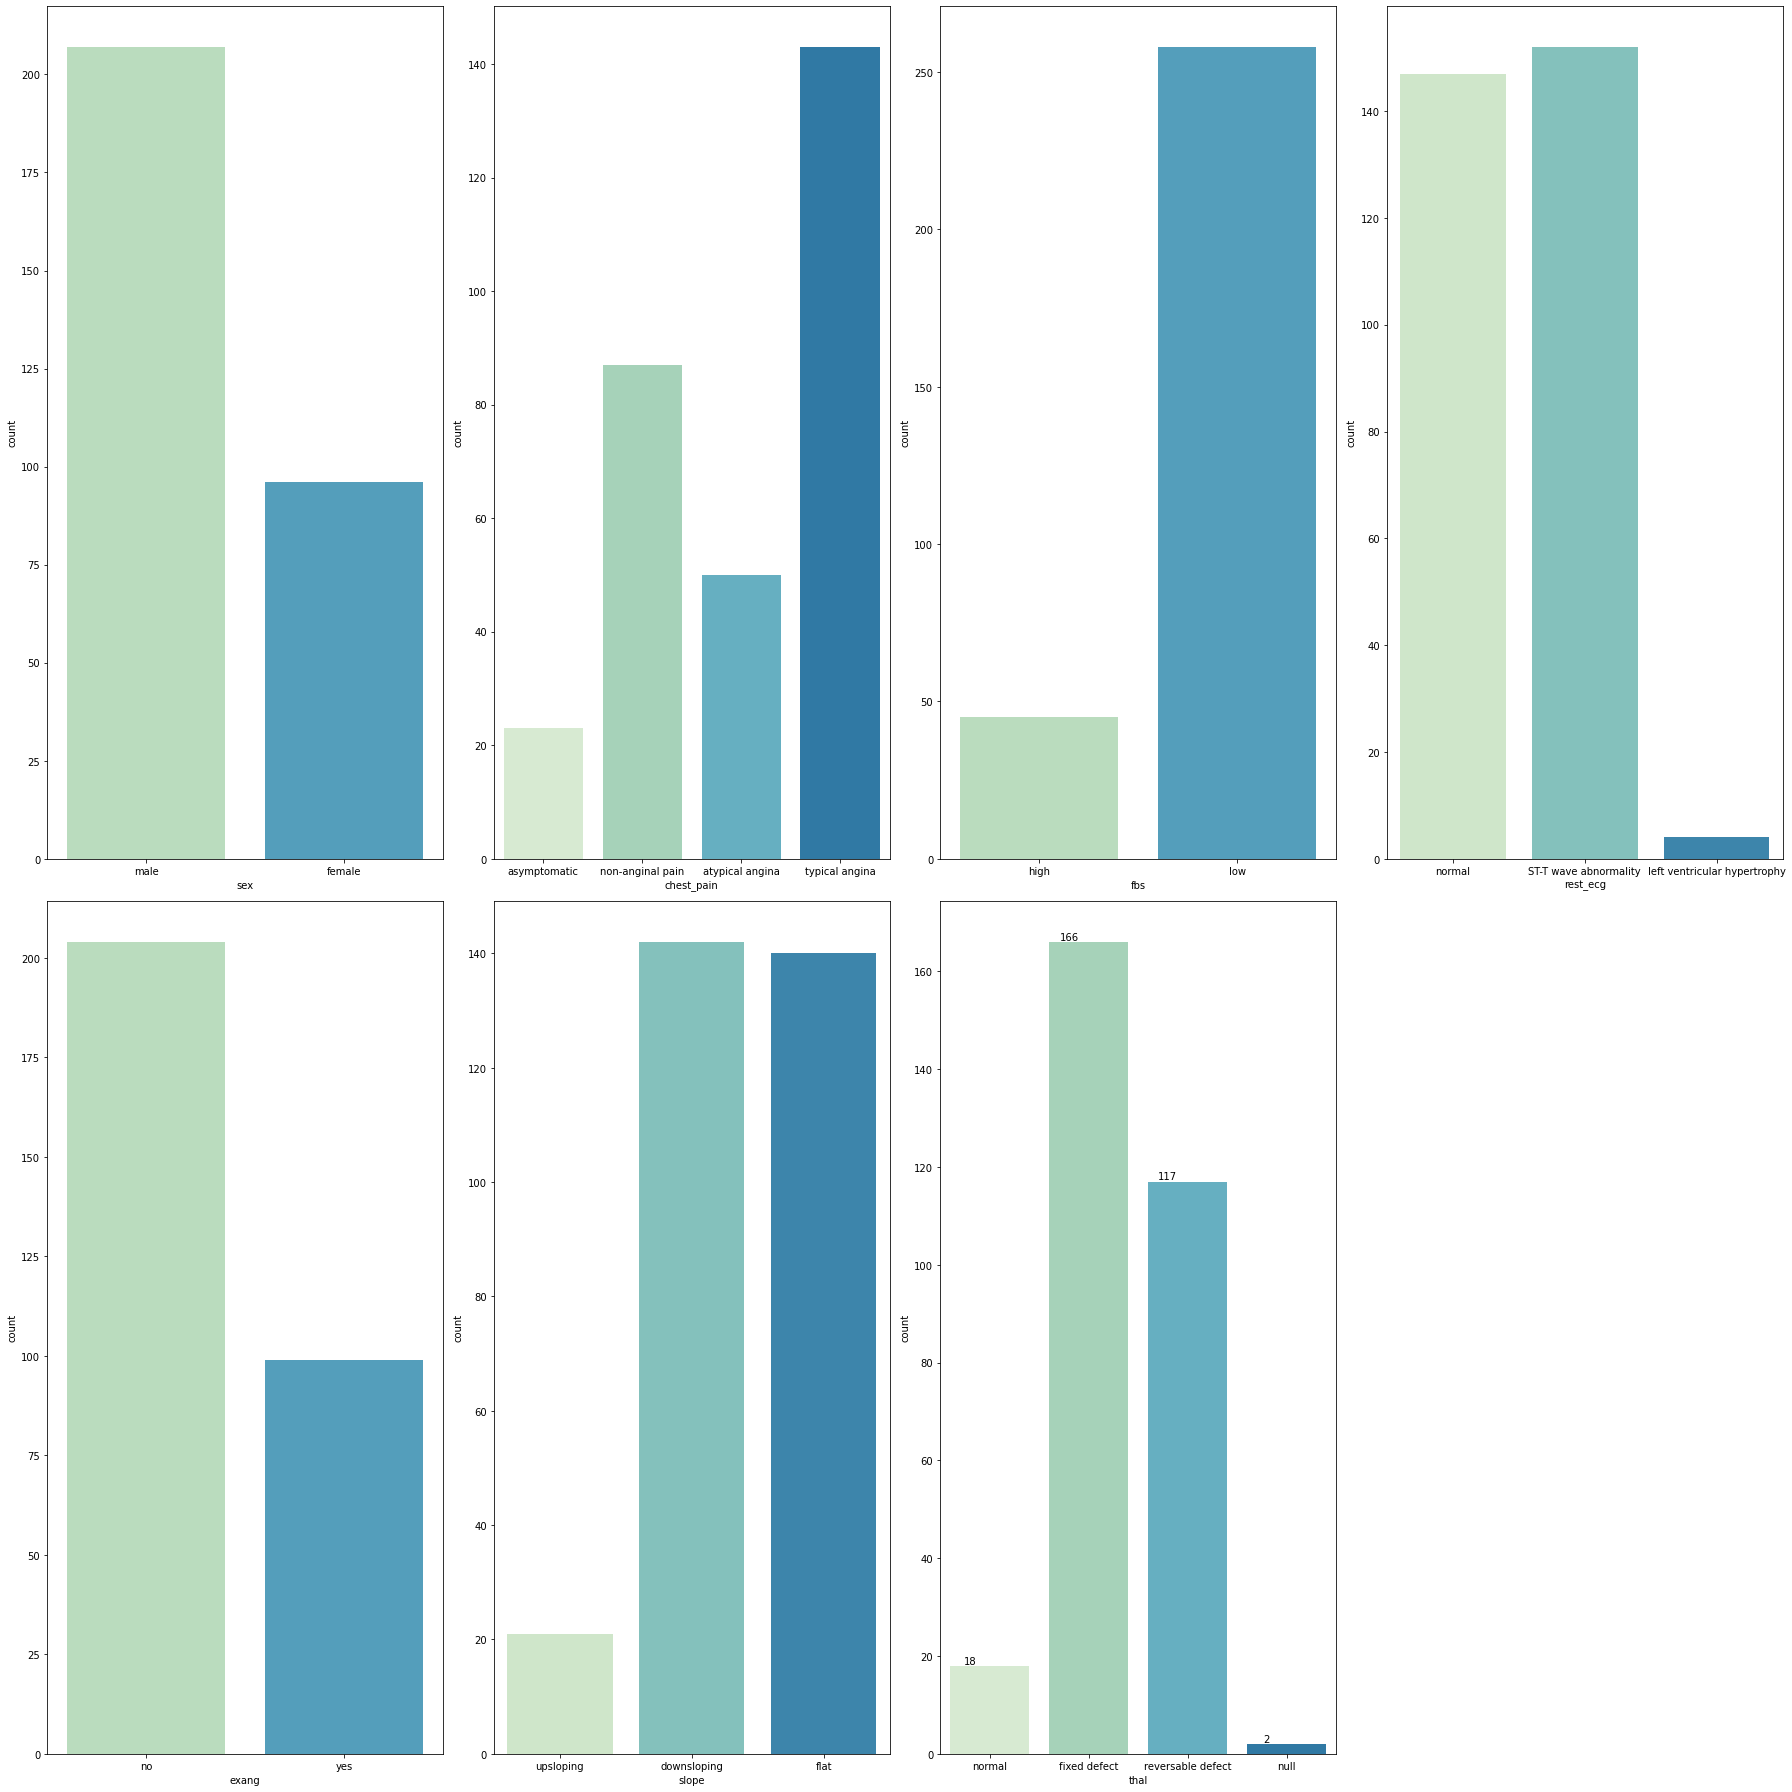

In [29]:
plt.figure(figsize=(25, 25))
for i in range(0, len(data_cat.columns)):
    plt.subplot(2, 4, i+1)
    graph = sns.countplot(x=data_cat.columns[i], data=data_cat, orient='v', palette='GnBu')
    plt.tight_layout()
    
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

- Male has a dominant Patient

- Majority Patient represent Typical Angina in **Chest pain type**

- Majority Patient represent Low Blood Sugar in **Fasting Blood Sugar**

- Majority Patient represent ST Wave Abnormality in **Rest ECG**

- Majority patient represent No **Exercise Induced Angina**

- Majority patient represent downsloping and flat Electrocardiogram in **Slope**

- Majority patient represent Fixed Defect in **Thalassemia**

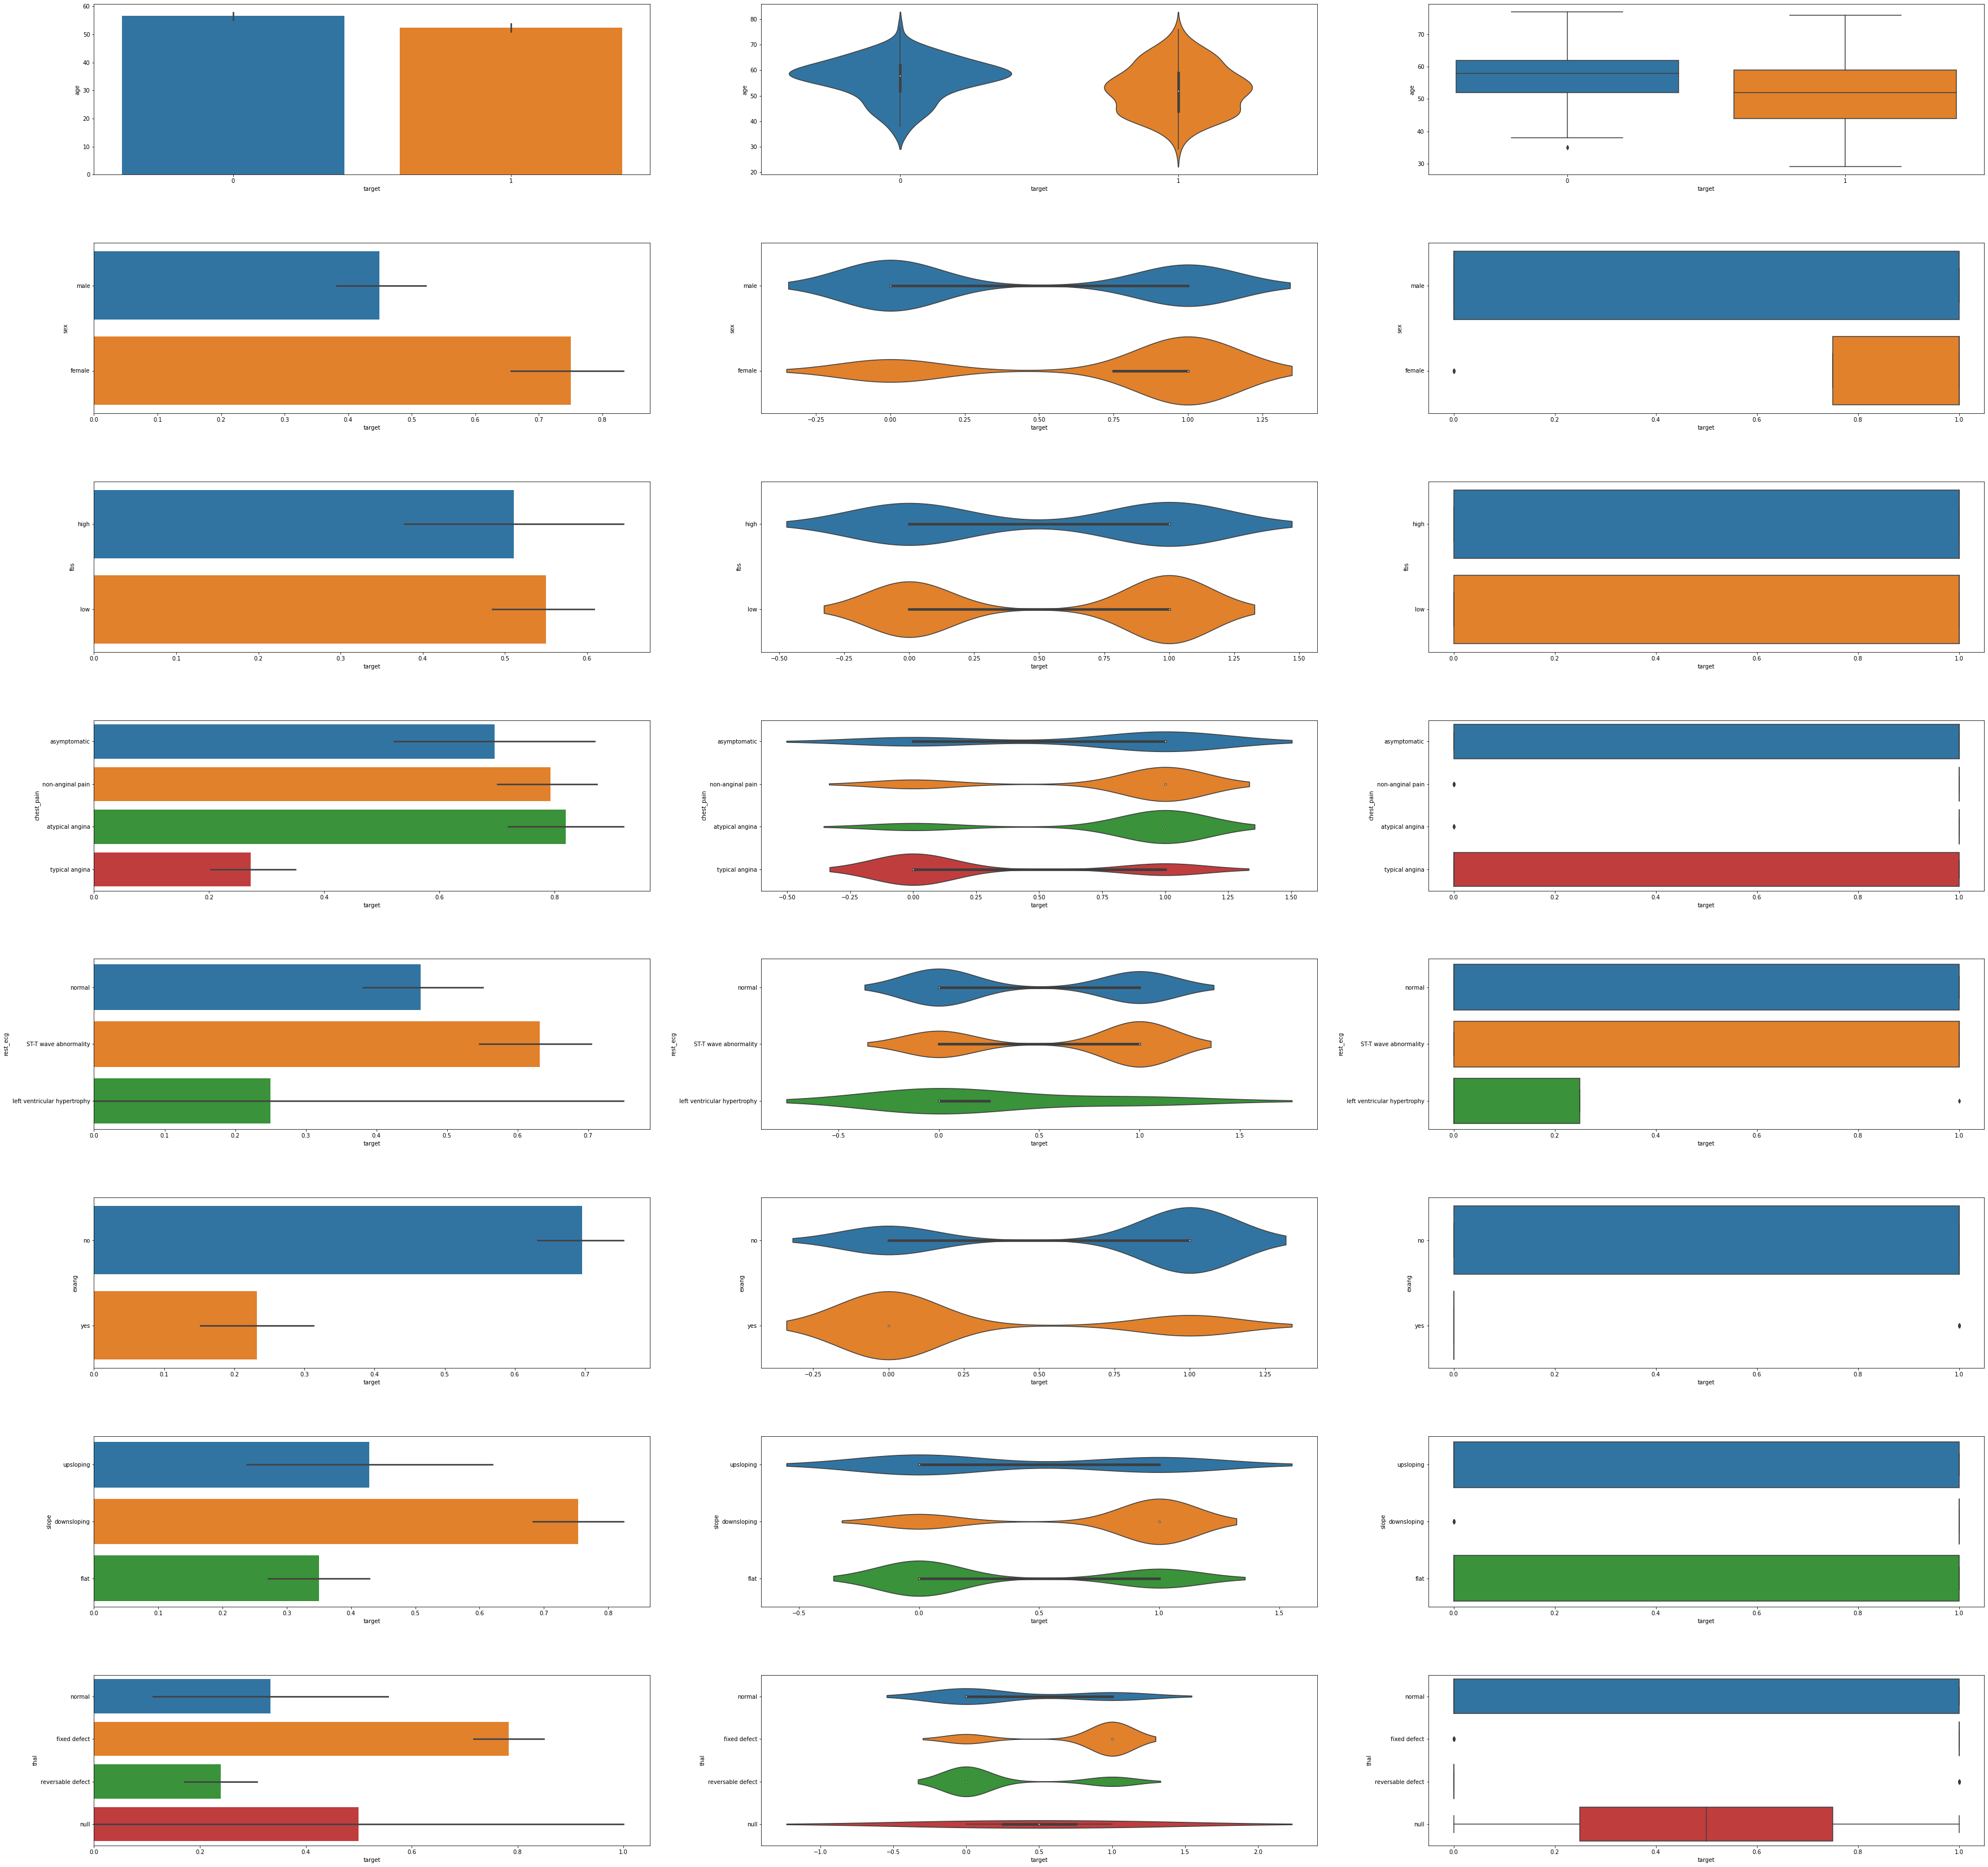

In [30]:
fig, axes = plt.subplots(nrows=8,ncols=3,  figsize=(60,60))
fig.subplots_adjust(hspace = .4, wspace=.2)
x = ['age','sex','fbs', 'chest_pain', 'rest_ecg','exang', 'slope', 'thal']
for i in range(0,len(x)):
    sns.barplot(heart['target'],heart[x[i]],ax=axes[i][0])
    sns.violinplot(heart['target'],heart[x[i]],ax=axes[i][1])
    sns.boxplot(heart['target'],heart[x[i]],ax=axes[i][2])

#### Charateristic

In [31]:
heart.columns

Index(['age', 'sex', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

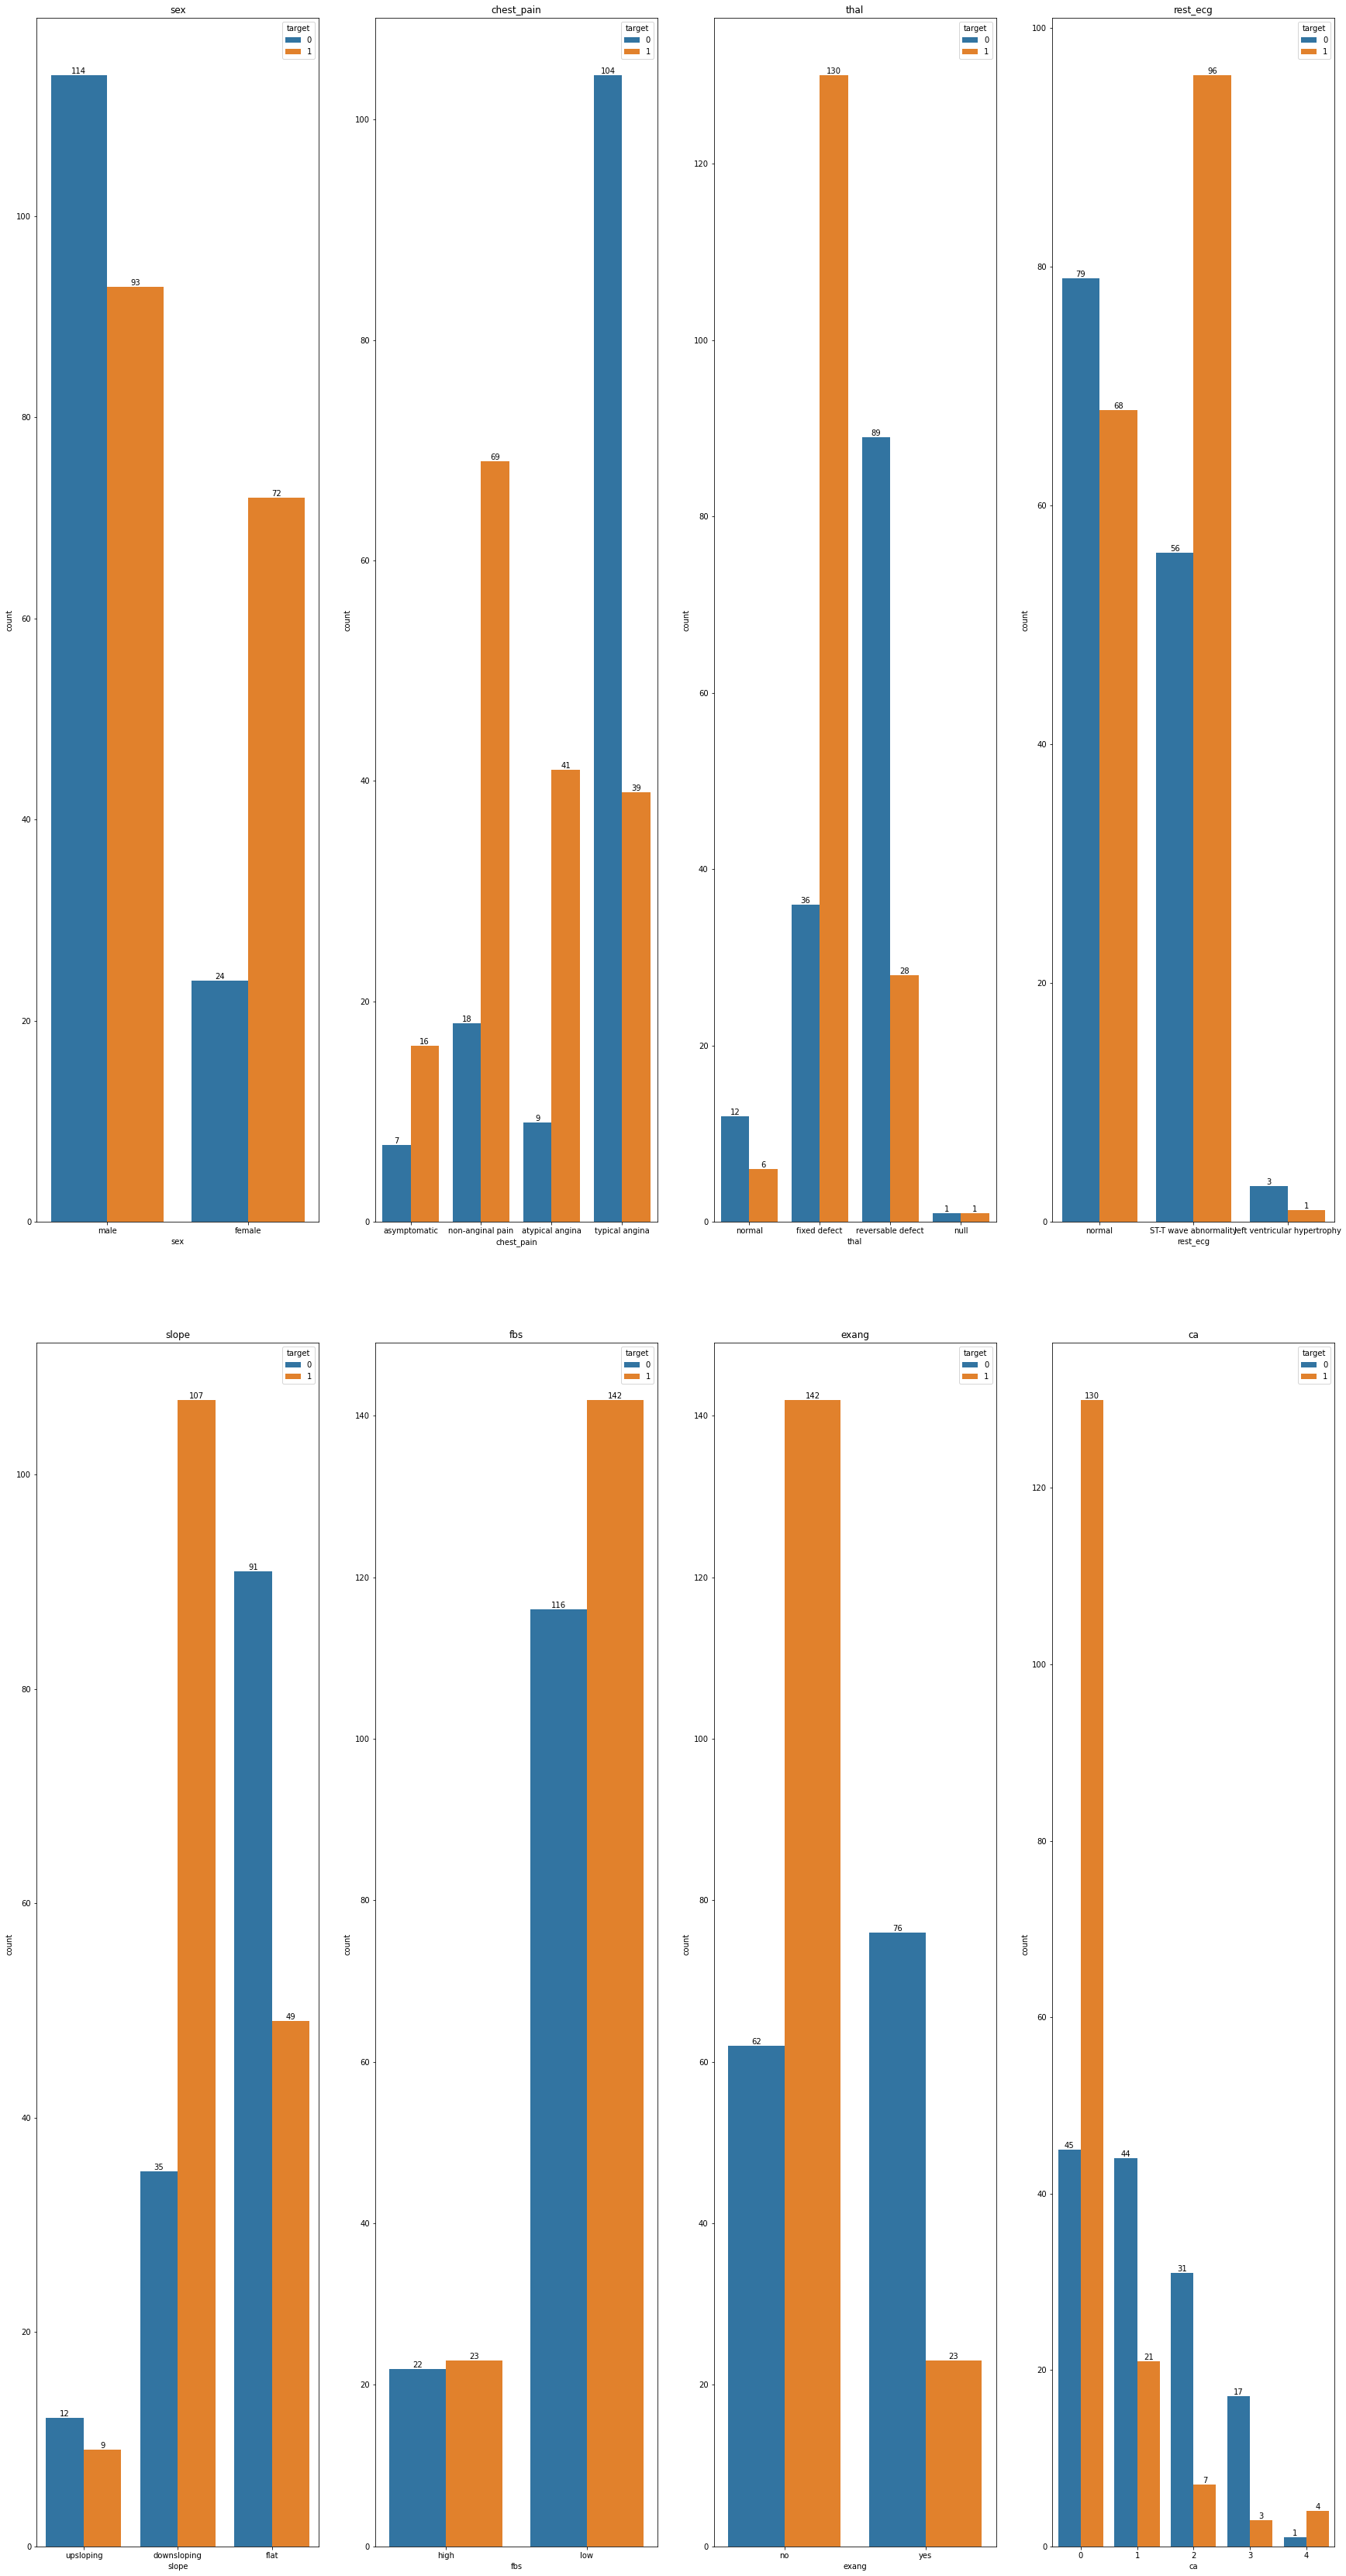

In [32]:
### Counts of Categorical variables
fig=plt.figure(figsize=(30,60))
fig.subplots_adjust(hspace =.1, wspace=.2)
x = ['sex','chest_pain','thal','rest_ecg','slope','fbs','exang','ca']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,4,i+1).set_title(x[i])
    graph = sns.countplot(heart[x[i]], hue = heart['target'])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Summary of Patient Characteristic**


• Male has a dominant Patient had heart disease

• The majority of patients diagnosed with heart disease have *non-anginal pain, normal thalassemmia, had ST Wave Abnormality, downsloping ST Slope, low blood sugar,had no exang*

• Major Vessel 0 has the most vessel which causes heart disease

##### 1. Gender

Text(0.5, 1.0, ' Characteristic Gender Categories')

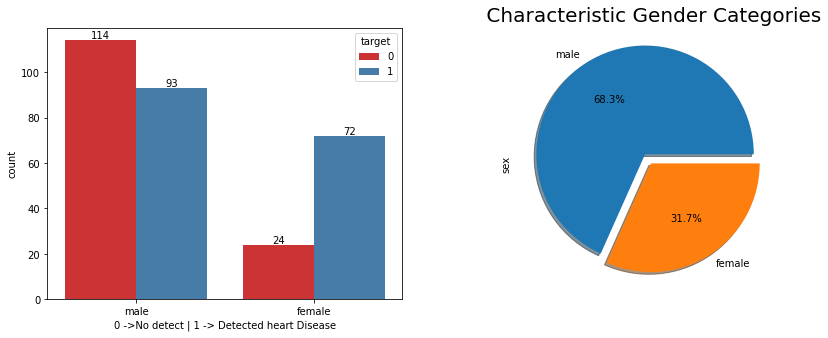

In [33]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='sex',data=heart,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->No detect | 1 -> Detected heart Disease")
heart.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title("0 ->No detect | 1 -> Detected heart Disease")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Gender Categories",fontsize = 20)

In [34]:
pd.crosstab(heart['sex'],heart['target'])

target    0   1
sex            
female   24  72
male    114  93

**Summary the Sex (Gender) Category is**

- **Female** : *31,7%*
    - No Detect: 24 patient
    - Detected: 72 patient
  
- **Male** : *68,3%*
    - No Detect: 114 patient
    - Detected: 93 patient

<i> Male is Majority Patient had 68,3% from population and the most detected heart disease<i>

------

##### 2. Age

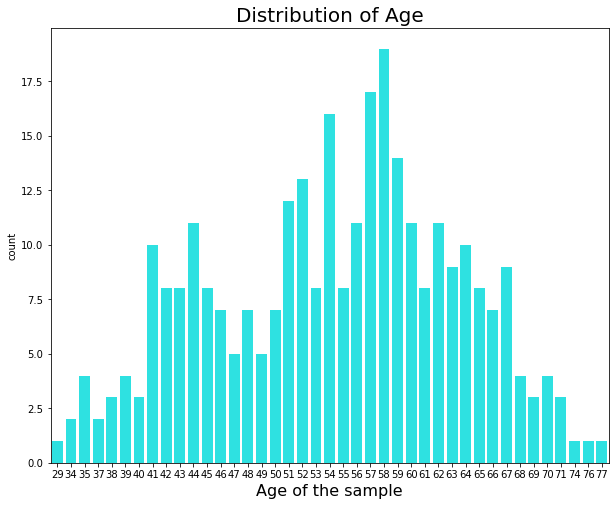

In [35]:
x = heart['age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='#10ffff')
ax.set_xlabel(xlabel = 'Age of the sample', fontsize = 16)
ax.set_title(label = 'Distribution of Age', fontsize = 20)
plt.show()

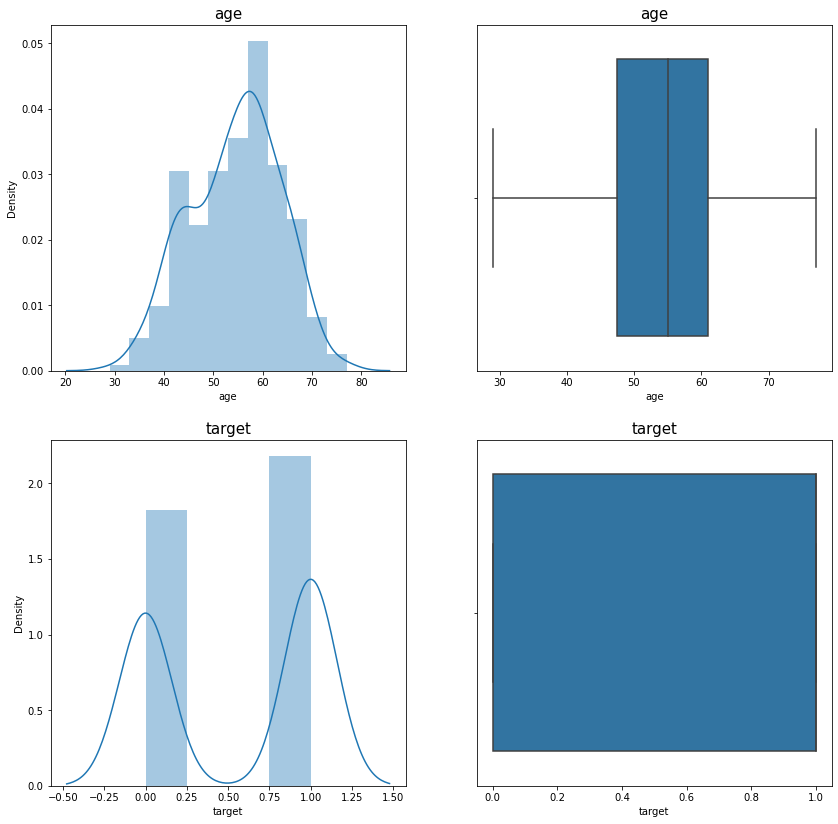

In [36]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14, 14)
a = sns.distplot(heart['age'] , ax=axes[0][0])
a.set_title("age",fontsize=15)
a = sns.boxplot(heart['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age",fontsize=15)

a = sns.distplot(heart['target'] , ax=axes[1][0])
a.set_title("target",fontsize=15)
a = sns.boxplot(heart['target'] , orient = "v" , ax=axes[1][1])
a.set_title("target",fontsize=15)
plt.show()

plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

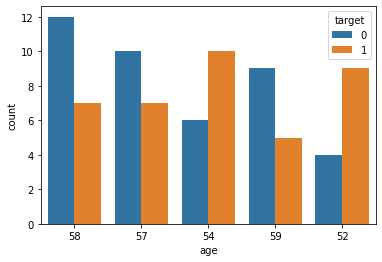

In [37]:
sns.countplot(x='age', data=heart, hue='target', order = heart['age'].value_counts().iloc[:5].index)

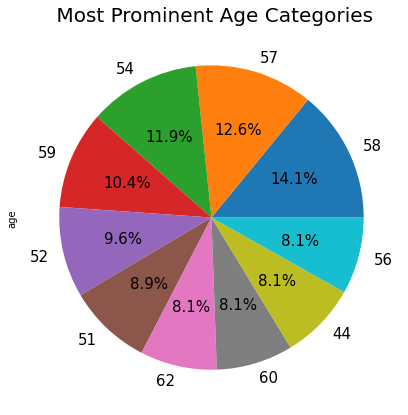

In [38]:
plt.figure(figsize=(7,7))
df = heart.age.value_counts().to_frame()
textprops = {"fontsize":15}
df.head(10).age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title(" Most Prominent Age Categories",fontsize = 20)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

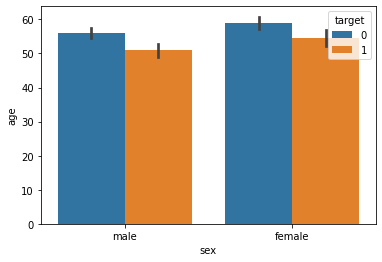

In [39]:
sns.barplot('sex','age',data=heart, hue = 'target')

**Summary the Sex (Gender) Category is**

• Age 54, 52, 58, 57, and 59 the most age have diagnosed had a heart disease

• Gender Male had a dominant patient who had diagnosed have heart disease

-----

##### 3. Fasting Blood Sugar

<AxesSubplot:xlabel='sex', ylabel='age'>

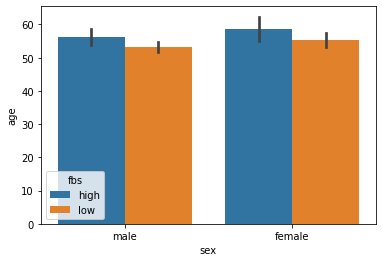

In [40]:
sns.barplot('sex','age',data=heart, hue = 'fbs')

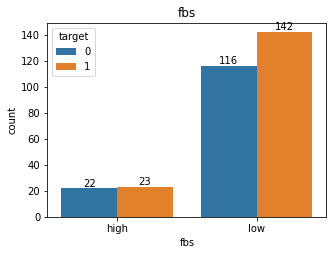

In [41]:
fig=plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace = .8, wspace=.3)
x = ['fbs']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    graph = sns.countplot(heart[x[i]],hue = heart['target'])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Text(0.5, 1.0, ' Characteristic Fasting Bloog Sugar with Target Categories')

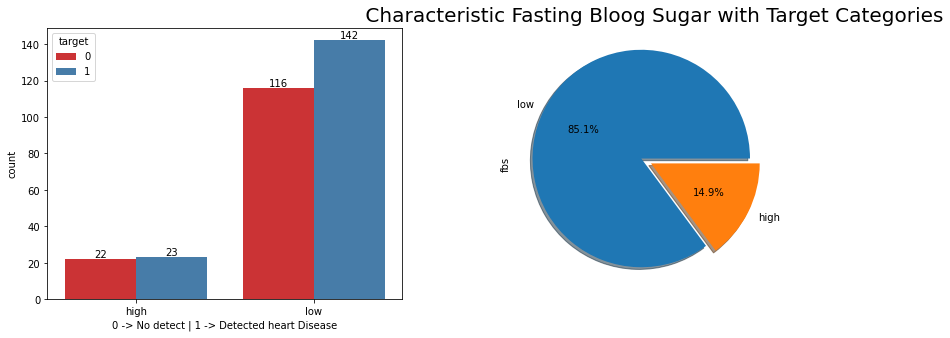

In [42]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='fbs',data=heart,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No detect | 1 -> Detected heart Disease")
heart.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title("0 -> No detect | 1 -> Detected heart Disease")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Fasting Bloog Sugar with Target Categories",fontsize = 20)

In [43]:
pd.crosstab(heart['fbs'],heart['target'])

target    0    1
fbs             
high     22   23
low     116  142

In [44]:
pd.crosstab(heart['fbs'],heart['sex'])

sex   female  male
fbs               
high      12    33
low       84   174

**Summary of Fast Blood Sugar Characteristic**

• Gender Male the dominant patient population who have high blood sugar

• the patients who had low blood sugar has the most number heart disease

---

##### 4. Chest Pain Type

<AxesSubplot:xlabel='sex', ylabel='age'>

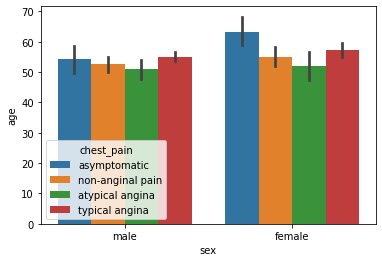

In [45]:
sns.barplot('sex','age',data=heart, hue='chest_pain')

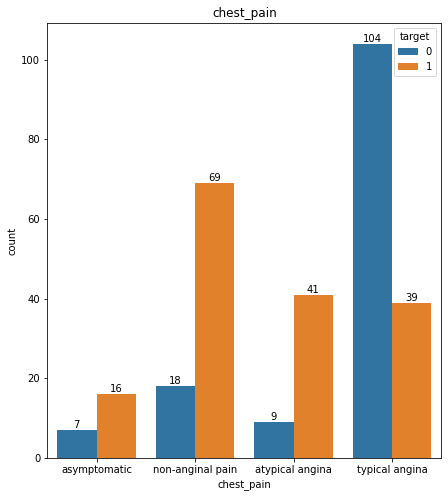

In [46]:
fig=plt.figure(figsize=(24,20))
fig.subplots_adjust(hspace = .50, wspace=.20)
x = ['chest_pain']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    graph = sns.countplot(heart[x[i]],hue = heart['target'])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Text(0.5, 1.0, ' Characteristic Chest Pain Type with target Categories')

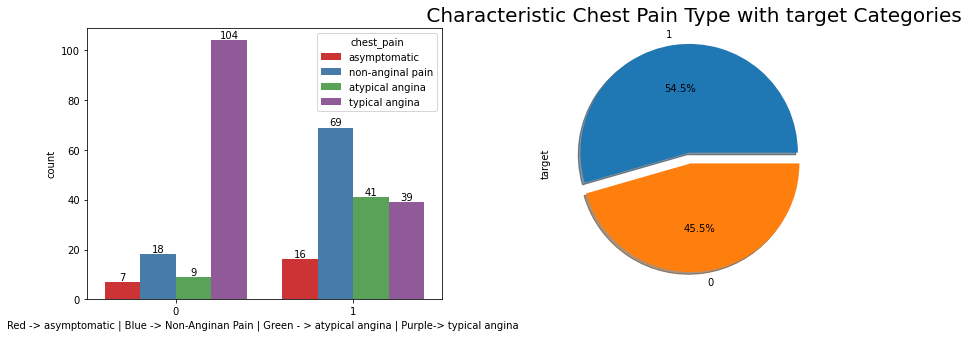

In [47]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='target',data=heart,hue='chest_pain',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> asymptomatic | Blue -> Non-Anginan Pain | Green - > atypical angina | Purple-> typical angina ")
heart.target.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title("Red -> asymptomatic | Blue -> Non-Anginan Pain | Green - > atypical angina | Purple-> typical angina")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Chest Pain Type with target Categories",fontsize = 20)

In [48]:
pd.crosstab(heart['chest_pain'],heart['target'])

target              0   1
chest_pain               
asymptomatic        7  16
atypical angina     9  41
non-anginal pain   18  69
typical angina    104  39

Text(0.5, 1.0, ' Characteristic chest pain with gender Categories')

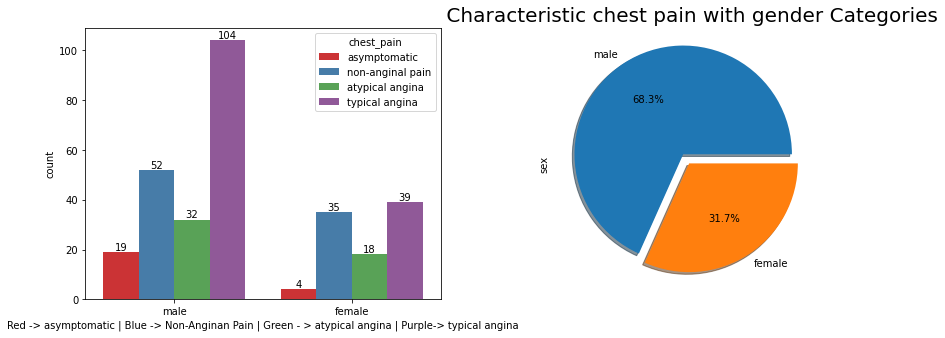

In [49]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='sex',data=heart,hue='chest_pain',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> asymptomatic | Blue -> Non-Anginan Pain | Green - > atypical angina | Purple-> typical angina")
heart.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title("Red -> asymptomatic | Blue -> Non-Anginan Pain | Green - > atypical angina | Purple-> typical angina")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic chest pain with gender Categories",fontsize = 20)

In [50]:
pd.crosstab(heart['chest_pain'],heart['sex'])

sex               female  male
chest_pain                    
asymptomatic           4    19
atypical angina       18    32
non-anginal pain      35    52
typical angina        39   104

**Summary of Chest Pain Type Characteristic**

• Gender Male the dominant patient population who have chest pain

• Majority patient has diagnosed had Typical Angina pain

-----

##### 5. Rest ECG

<AxesSubplot:xlabel='sex', ylabel='age'>

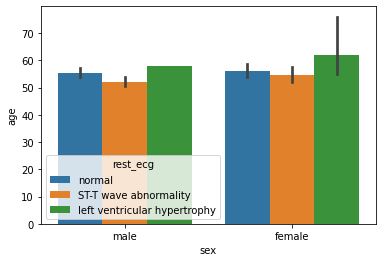

In [51]:
sns.barplot('sex','age',data=heart, hue = 'rest_ecg')

Text(0.5, 1.0, ' Characteristic Rest ECG with gender Categories')

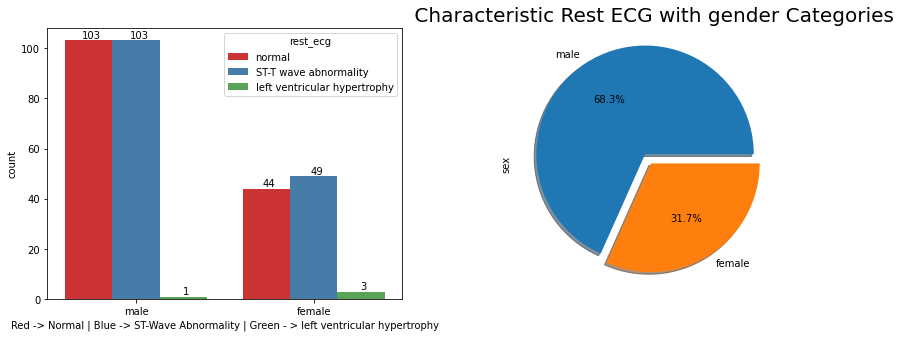

In [52]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='sex',data=heart,hue='rest_ecg',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> Normal | Blue -> ST-Wave Abnormality | Green - > left ventricular hypertrophy")
heart.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Rest ECG with gender Categories",fontsize = 20)

In [53]:
pd.crosstab(heart['rest_ecg'],heart['sex'])

sex                           female  male
rest_ecg                                  
ST-T wave abnormality             49   103
left ventricular hypertrophy       3     1
normal                            44   103

Text(0.5, 1.0, ' Characteristic Rest ECG with target Categories')

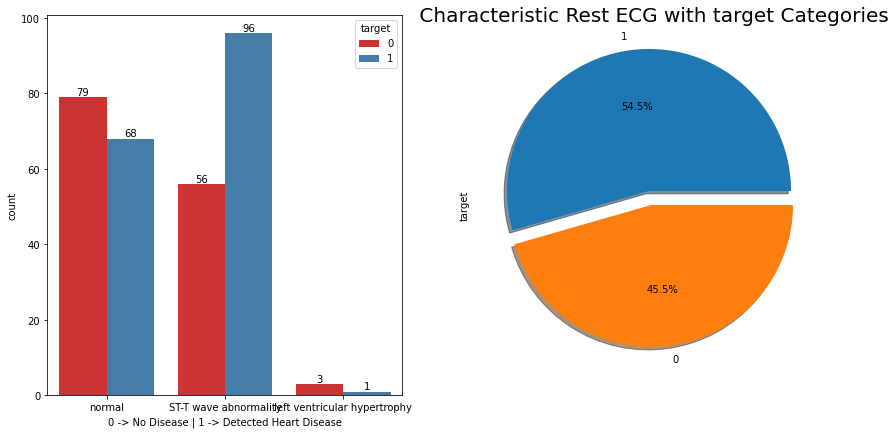

In [54]:
fig,ax=plt.subplots(1,2,figsize=(14,7))
graph = sns.countplot(x='rest_ecg',data=heart,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No Disease | 1 -> Detected Heart Disease")
heart.target.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Rest ECG with target Categories",fontsize = 20)

In [55]:
pd.crosstab(heart['rest_ecg'],heart['target'])

target                         0   1
rest_ecg                            
ST-T wave abnormality         56  96
left ventricular hypertrophy   3   1
normal                        79  68

**Summary of Rest ECG Type Characteristic**

• Patient with result test of ECG ST-T Wave Abnormality and Normal have the most diagnosed heart disease

-----

##### 6. ST Slope

<AxesSubplot:xlabel='sex', ylabel='age'>

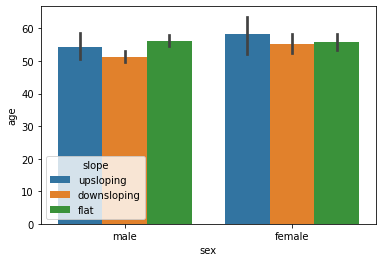

In [56]:
sns.barplot('sex','age',data=heart, hue = 'slope')

Text(0.5, 1.0, ' Characteristic ST-Slope with gender Categories')

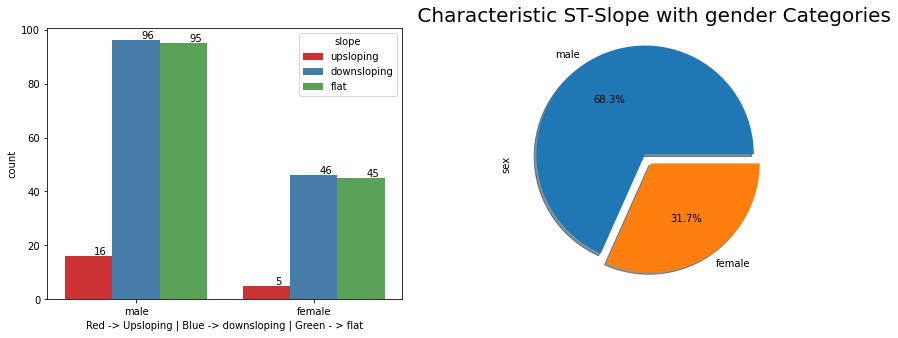

In [57]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='sex',data=heart,hue='slope',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> Upsloping | Blue -> downsloping | Green - > flat")
heart.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic ST-Slope with gender Categories",fontsize = 20)

In [58]:
pd.crosstab(heart['sex'],heart['slope'])

slope   downsloping  flat  upsloping
sex                                 
female           46    45          5
male             96    95         16

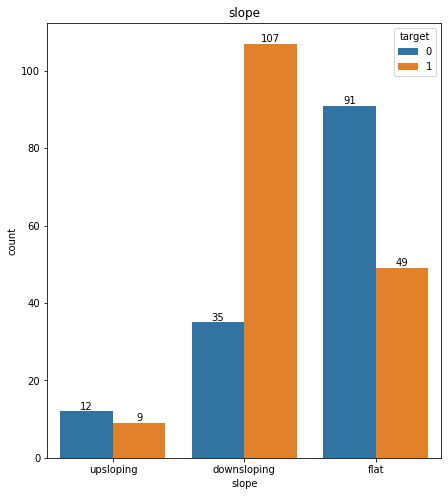

In [59]:
fig=plt.figure(figsize=(24,20))
fig.subplots_adjust(hspace = .50, wspace=.20)
x = ['slope']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    graph = sns.countplot(heart[x[i]],hue = heart['target'])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [60]:
pd.crosstab(heart['slope'],heart['target'])

target        0    1
slope               
downsloping  35  107
flat         91   49
upsloping    12    9

**Summary of ST Slope Type Characteristic**

• Patient with the result test downsloping has the most diagnosed have heart disease

----

##### 7. EXANG ( Exercise Induced Angina )

<AxesSubplot:xlabel='sex', ylabel='age'>

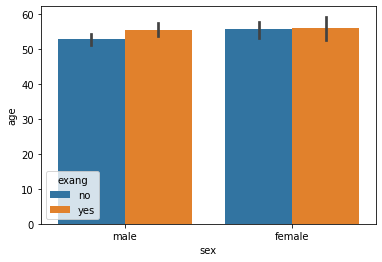

In [61]:
sns.barplot('sex','age',data=heart, hue = 'exang')

Text(0.5, 1.0, ' Characteristic EXANG with gender Categories')

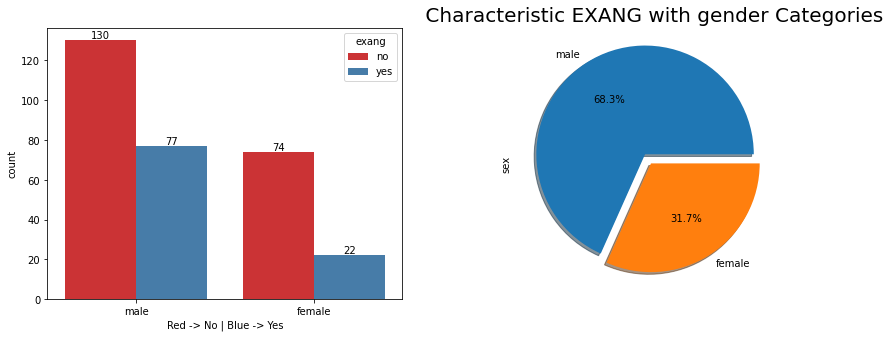

In [62]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='sex',data=heart,hue='exang',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> No | Blue -> Yes")
heart.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic EXANG with gender Categories",fontsize = 20)

In [63]:
pd.crosstab(heart['exang'],heart['sex'])

sex    female  male
exang              
no         74   130
yes        22    77

Text(0.5, 1.0, ' Characteristic ST-Slope with target Categories')

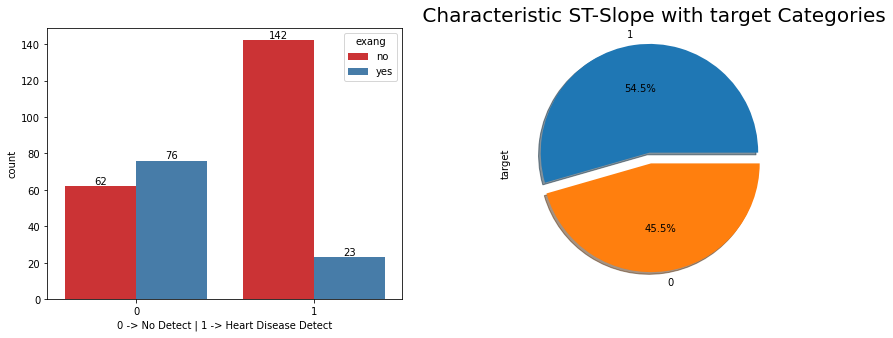

In [64]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='target',data=heart,hue='exang',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No Detect | 1 -> Heart Disease Detect")
heart.target.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic ST-Slope with target Categories",fontsize = 20)

In [65]:
pd.crosstab(heart['exang'],heart['target'])

target   0    1
exang          
no      62  142
yes     76   23

**Summary of Exercise induced Angina Characteristic**

• Patient with the result cardiac test have no angina symptoms the most diagnosed had heart disease

-----

##### 8. Thalassemia

<AxesSubplot:xlabel='sex', ylabel='age'>

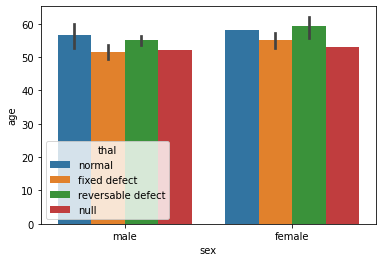

In [66]:
sns.barplot('sex','age',data=heart, hue = 'thal')

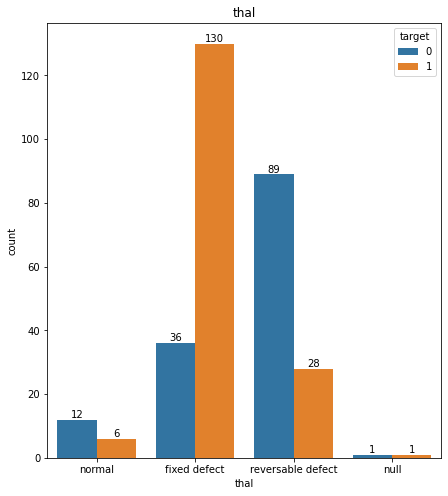

In [67]:
fig=plt.figure(figsize=(24,20))
fig.subplots_adjust(hspace = .50, wspace=.20)
x = ['thal']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    graph = sns.countplot(heart[x[i]],hue = heart['target'])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Text(0.5, 1.0, ' Characteristic thalassemia with target Categories')

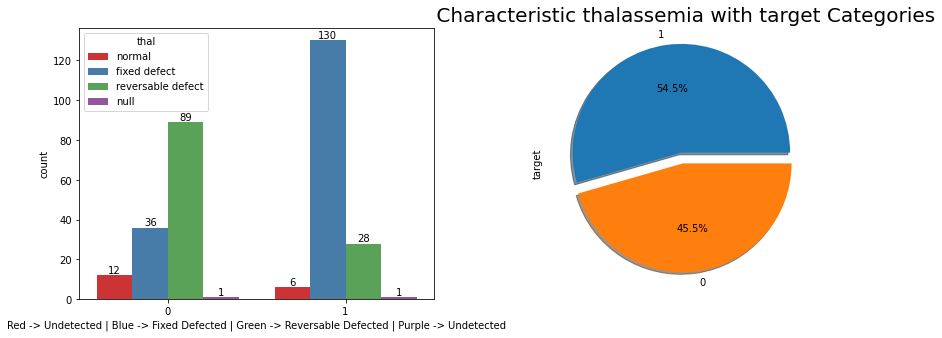

In [68]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='target',data=heart,hue='thal',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> Undetected | Blue -> Fixed Defected | Green -> Reversable Defected | Purple -> Undetected")
heart.target.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic thalassemia with target Categories",fontsize = 20)

In [69]:
pd.crosstab(heart['thal'],heart['target'])

target              0    1
thal                      
fixed defect       36  130
normal             12    6
null                1    1
reversable defect  89   28

Text(0.5, 1.0, ' Characteristic thalassemia with gender Categories')

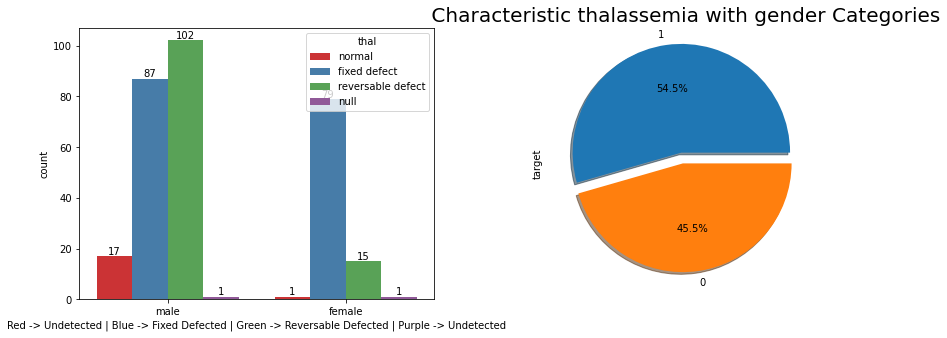

In [70]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='sex',data=heart,hue='thal',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> Undetected | Blue -> Fixed Defected | Green -> Reversable Defected | Purple -> Undetected")
heart.target.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic thalassemia with gender Categories",fontsize = 20)

In [71]:
pd.crosstab(heart['thal'],heart['sex'])

sex                female  male
thal                           
fixed defect           79    87
normal                  1    17
null                    1     1
reversable defect      15   102

**Summary of Thalessemia Type Characteristic**

• Patients with result test fixed defect and normal thalassemia symptoms had the most diagnosed heart disease

• The most patient have the results thalassemia symptoms is male

-------

##### 9. Number Major Vessels (CA)

Text(0.5, 1.0, ' Characteristic Major Blood Vessel with target Categories')

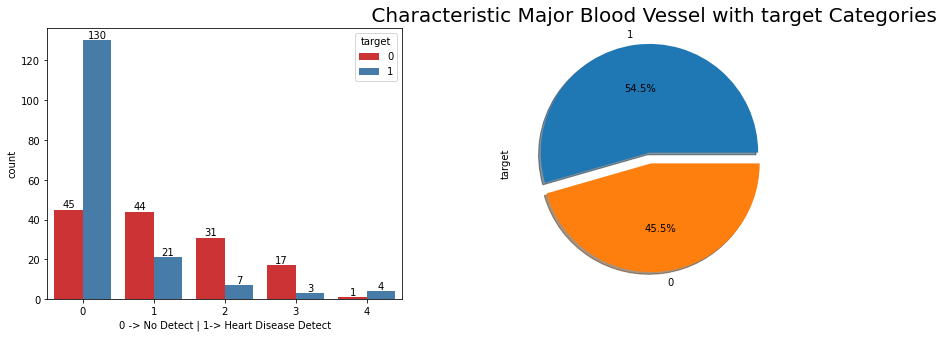

In [72]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='ca',data=heart,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No Detect | 1-> Heart Disease Detect")
heart.target.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Major Blood Vessel with target Categories",fontsize = 20)

In [73]:
pd.crosstab(heart['ca'],heart['target'])

target   0    1
ca             
0       45  130
1       44   21
2       31    7
3       17    3
4        1    4

**Summary of Major Vessels Characteristic**

• Patient with the result had heart disease,have abnormality in Number 0 Major Vessel

• 54.5 %  patient who have abnormality major vessel detected had heart disease

-----

##### 10. Target

1    165
0    138
Name: target, dtype: int64

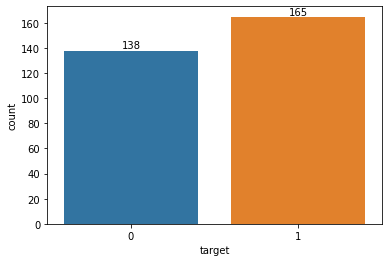

In [74]:
display(heart['target'].value_counts())
print("\n")
graph = sns.countplot(heart['target'])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [75]:
heart_disease = heart[heart['target']==1]

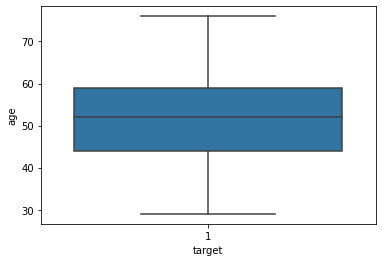

In [76]:
sns.boxplot(y='age', x='target', data=heart_disease);

<AxesSubplot:xlabel='age', ylabel='sex'>

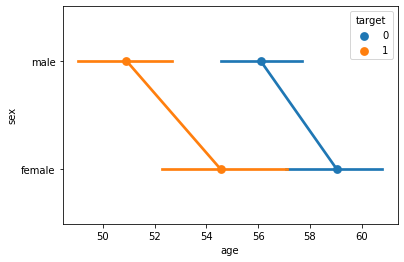

In [77]:
sns.pointplot('age','sex',data=heart, hue='target')

**Summary of Target Type Characteristic**

- **165** Patients detected have heart disease
- Age range of patients who were detected to have heart disease ranged from 45 to 60 years old

-------

-------

# Data Cleaning & Pre-Processing

----

----

# Clean Data

## Missing Value

In [78]:
heart.isnull().sum()

age            0
sex            0
chest_pain     0
trestbps       0
cholesterol    0
fbs            0
rest_ecg       0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target         0
dtype: int64

the patients dataframe has no null values

----

## Duplicated Data

In [79]:
if heart.duplicated().sum() == 0:
    print('There is no duplicated data')
else:
    print('There are duplicated data: ', heart.duplicated().sum())

There are duplicated data:  1


In [80]:
duplicate = heart.duplicated()
duplicate.sum()

1

In [81]:
#heart.drop_duplicates(inplace=True)
#heart.shape

---

## Remove Outliers

data frames that have outliers include ***trestbps, cholesterol, oldpeak , thalach, and CA***. we will remove the outliers from all of these columns

In [82]:
heart.columns

Index(['age', 'sex', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

#### 1. Outliers Resting blood presure

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

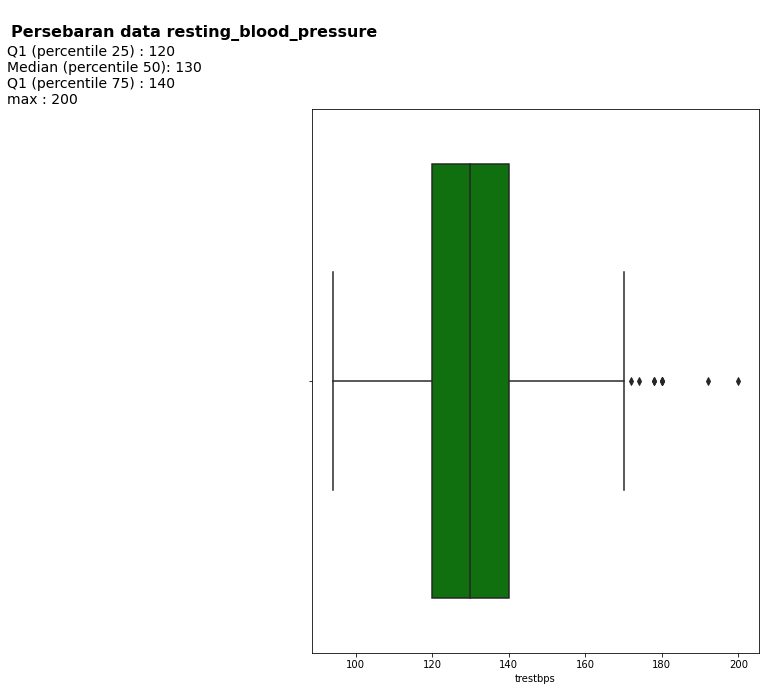

In [83]:
fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(heart['trestbps'],color='green',orient='h')

title = '''
Persebaran data resting_blood_pressure
'''
ax.text(10,-0.6,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')

text = '''
Q1 (percentile 25) : 120
Median (percentile 50): 130
Q1 (percentile 75) : 140
max : 200

'''
ax.text(9,-0.45,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.tight_layout

##### Log Transform Rest Blood Presure

In [84]:
Q1 = heart['trestbps'].quantile(0.25)
Q3 = heart['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((heart['trestbps'] < (lower_range)) | (heart['trestbps'] > (upper_range))).sum()

Number of Outliers:


9

In [85]:
((((heart['trestbps'] < (lower_range)) | (heart['trestbps'] > (upper_range))).sum())/heart.shape[0])*100

2.9702970297029703

In [86]:
print('Upper Range: {}\nLower Range:{}'.format(upper_range,lower_range))

Upper Range: 170.0
Lower Range:90.0


In [87]:
Q1 = heart['trestbps'].quantile(0.25)
Q3 = heart['trestbps'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
High_limit = Q3 + (1.5 * IQR)
filtered_entries = ((heart['trestbps'] >= low_limit) & (heart['trestbps'] <= High_limit))
heart = heart[filtered_entries]

Text(0.5, 0, '')

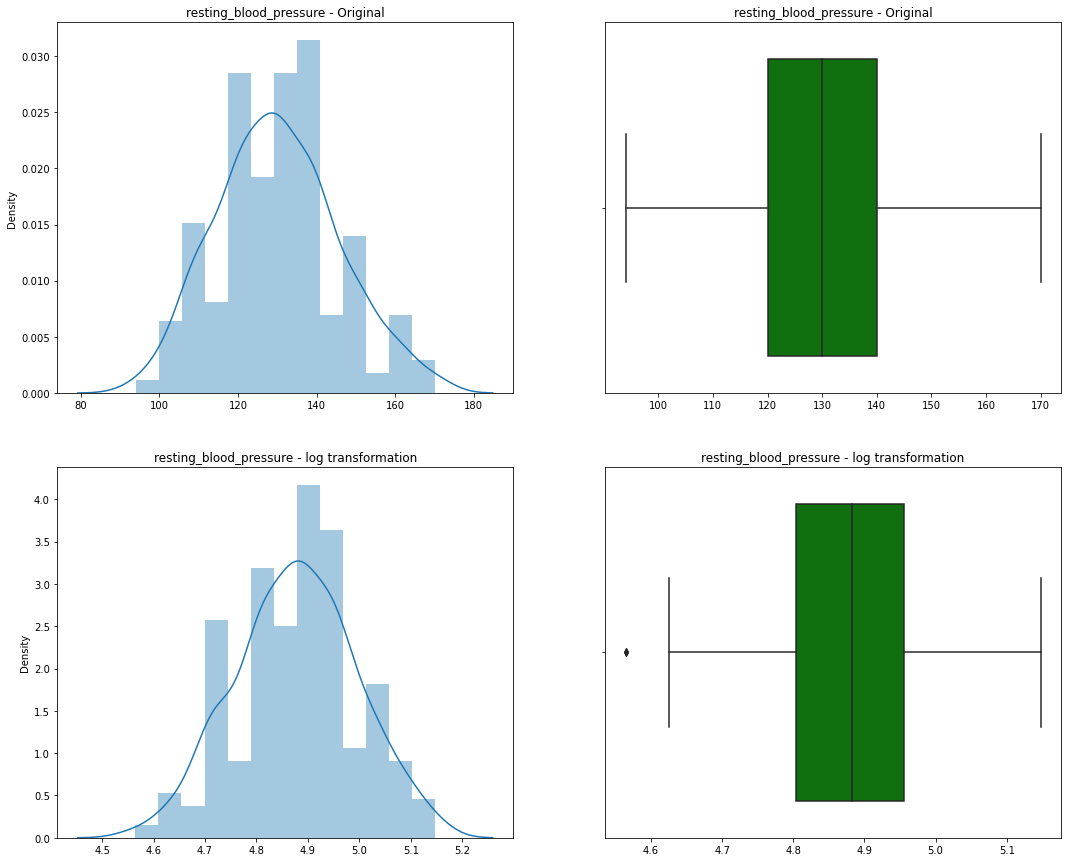

In [88]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(heart['trestbps'],kde=True, ax=ax[0,0])
ax[0,0].set_title('resting_blood_pressure - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(heart['trestbps'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('resting_blood_pressure - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(heart['trestbps']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('resting_blood_pressure - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(heart['trestbps']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('resting_blood_pressure - log transformation')
ax[1,1].set_xlabel('')

#### 2. Outliers Cholesterol

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

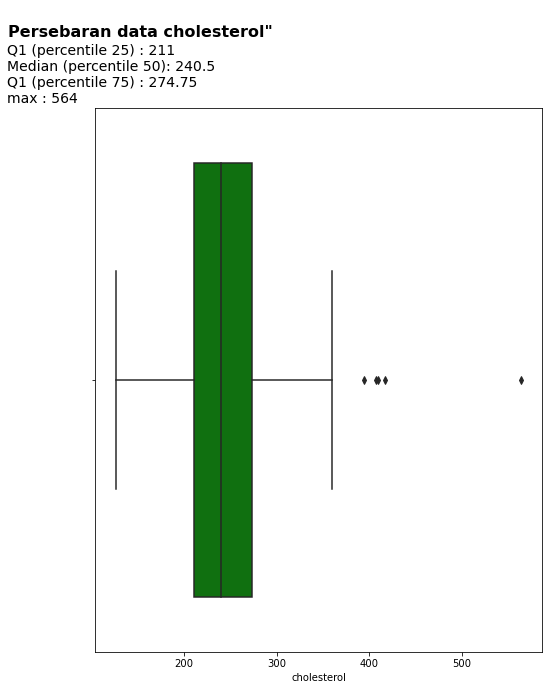

In [89]:
fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(heart['cholesterol'],color='green',orient='h')

title = '''
Persebaran data cholesterol"
'''
ax.text(10,-0.6,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')

text = '''
Q1 (percentile 25) : 211
Median (percentile 50): 240.5
Q1 (percentile 75) : 274.75
max : 564

'''
ax.text(9,-0.45,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.tight_layout

##### Log Transform Cholesterol

In [90]:
Q1 = heart['cholesterol'].quantile(0.25)
Q3 = heart['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((heart['cholesterol'] < (lower_range)) | (heart['cholesterol'] > (upper_range))).sum()

Number of Outliers:


5

In [91]:
((((heart['cholesterol'] < (lower_range)) | (heart['cholesterol'] > (upper_range))).sum())/heart.shape[0])*100

1.7006802721088436

In [92]:
print('Upper Range: {}\nLower Range:{}'.format(upper_range,lower_range))

Upper Range: 367.875
Lower Range:116.875


In [93]:
Q1 = heart['cholesterol'].quantile(0.25)
Q3 = heart['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
High_limit = Q3 + (1.5 * IQR)
filtered_entries = ((heart['cholesterol'] >= low_limit) & (heart['cholesterol'] <= High_limit))
heart = heart[filtered_entries]

Text(0.5, 0, '')

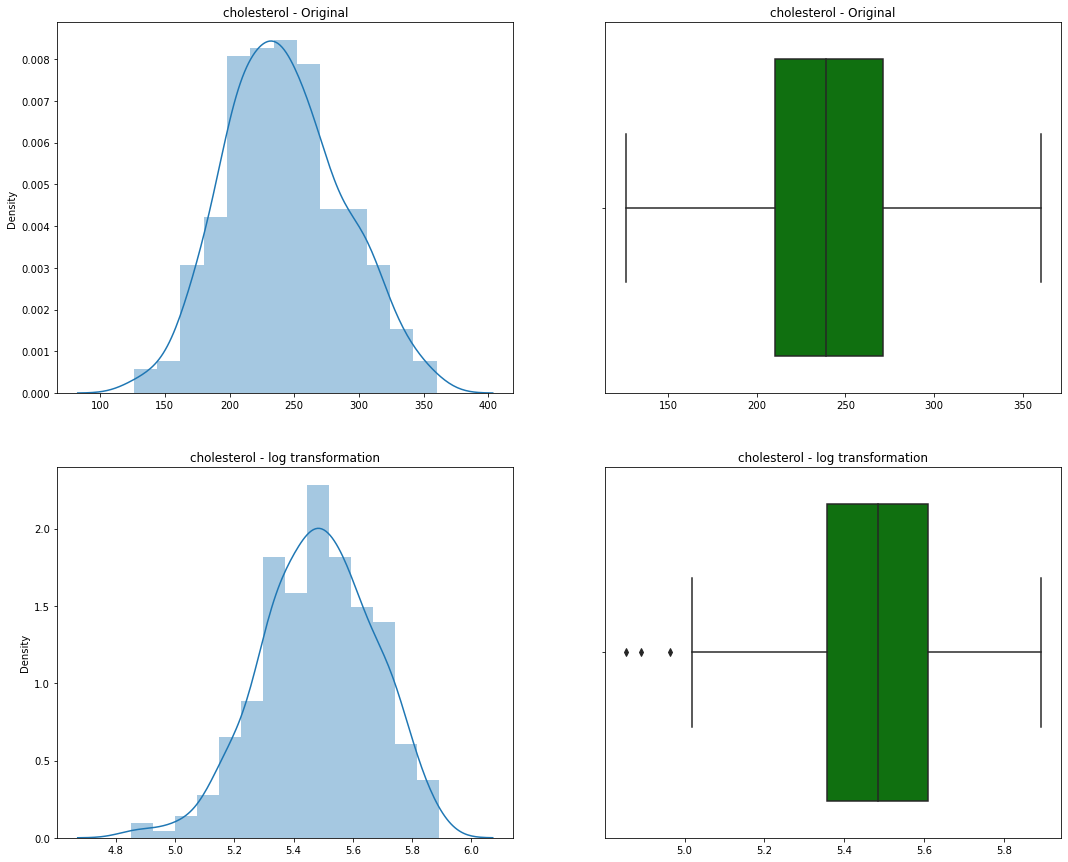

In [94]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(heart['cholesterol'],kde=True, ax=ax[0,0])
ax[0,0].set_title('cholesterol - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(heart['cholesterol'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('cholesterol - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(heart['cholesterol']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('cholesterol - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(heart['cholesterol']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('cholesterol - log transformation')
ax[1,1].set_xlabel('')

#### 3. Outliers ST depression

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

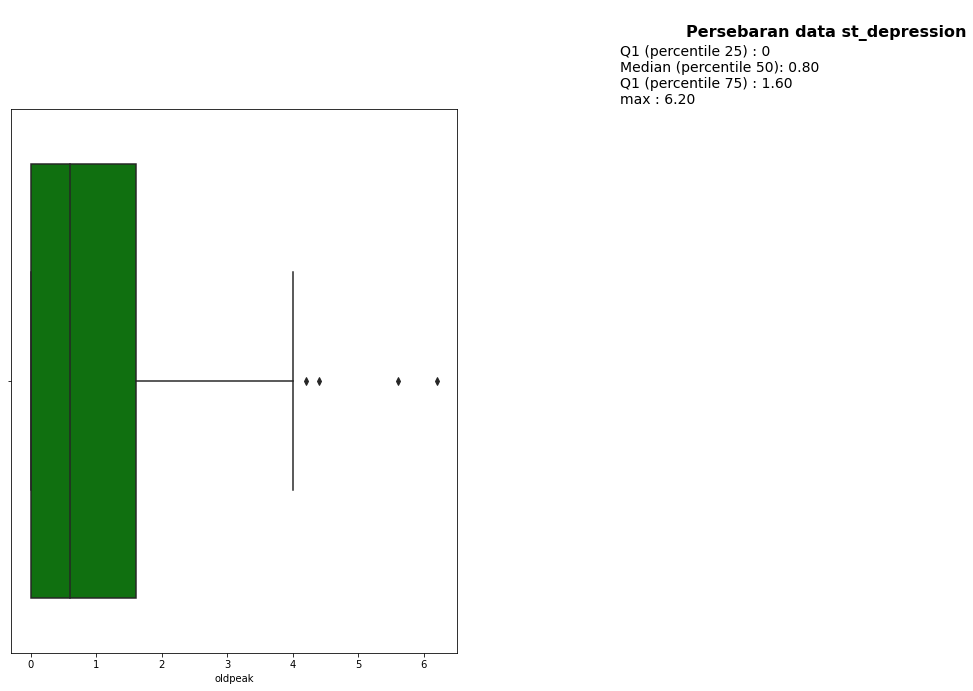

In [95]:
fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(heart['oldpeak'],color='green',orient='h')

title = '''
Persebaran data st_depression
'''
ax.text(10,-0.6,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')

text = '''
Q1 (percentile 25) : 0
Median (percentile 50): 0.80
Q1 (percentile 75) : 1.60
max : 6.20

'''
ax.text(9,-0.45,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.tight_layout

##### Log Transform ST depression

In [96]:
Q1 = heart['oldpeak'].quantile(0.25)
Q3 = heart['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((heart['oldpeak'] < (lower_range)) | (heart['oldpeak'] > (upper_range))).sum()

Number of Outliers:


4

In [97]:
((((heart['oldpeak'] < (lower_range)) | (heart['oldpeak'] > (upper_range))).sum())/heart.shape[0])*100

1.384083044982699

In [98]:
print('Upper Range: {}\nLower Range:{}'.format(upper_range,lower_range))

Upper Range: 4.0
Lower Range:-2.4000000000000004


In [99]:
Q1 = heart['oldpeak'].quantile(0.25)
Q3 = heart['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
High_limit = Q3 + (1.5 * IQR)
filtered_entries = ((heart['oldpeak'] >= low_limit) & (heart['oldpeak'] <= High_limit))
heart = heart[filtered_entries]

Text(0.5, 0, '')

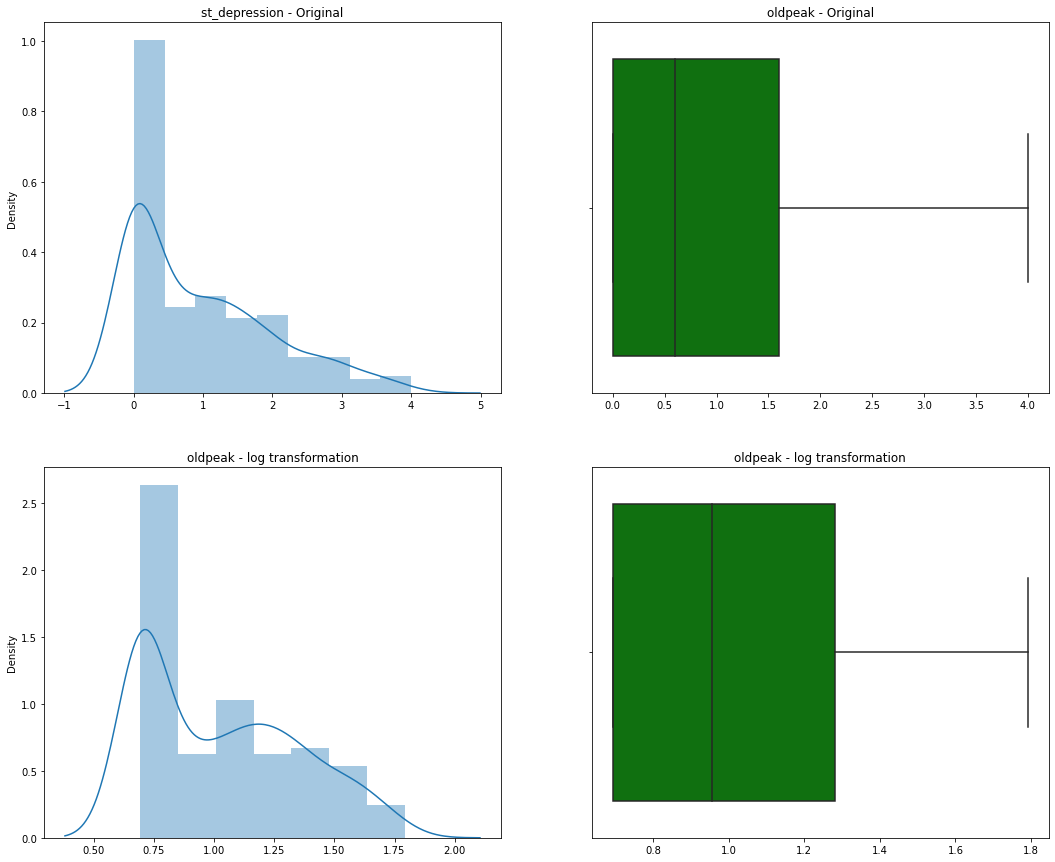

In [100]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(heart['oldpeak'],kde=True, ax=ax[0,0])
ax[0,0].set_title('st_depression - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(heart['oldpeak'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('oldpeak - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(heart['oldpeak']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('oldpeak - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(heart['oldpeak']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('oldpeak - log transformation')
ax[1,1].set_xlabel('')


#### 4. Outliers Max Heart Rate Achieved

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

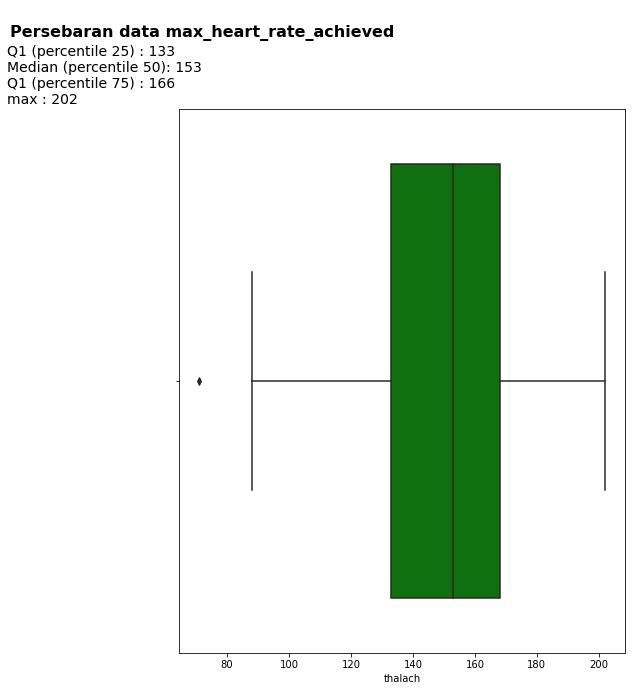

In [101]:
fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(heart['thalach'],color='green',orient='h')

title = '''
Persebaran data max_heart_rate_achieved
'''
ax.text(10,-0.6,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')

text = '''
Q1 (percentile 25) : 133
Median (percentile 50): 153
Q1 (percentile 75) : 166
max : 202

'''
ax.text(9,-0.45,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.tight_layout

##### Log Transform Max Heart Rate

In [102]:
Q1 = heart['thalach'].quantile(0.25)
Q3 = heart['thalach'].quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((heart['thalach'] < (lower_range)) | (heart['thalach'] > (upper_range))).sum()

Number of Outliers:


1

In [103]:
((((heart['thalach'] < (lower_range)) | (heart['thalach'] > (upper_range))).sum())/heart.shape[0])*100

0.3508771929824561

In [104]:
print('Upper Range: {}\nLower Range:{}'.format(upper_range,lower_range))

Upper Range: 220.5
Lower Range:80.5


In [105]:
Q1 = heart['thalach'].quantile(0.25)
Q3 = heart['thalach'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
High_limit = Q3 + (1.5 * IQR)
filtered_entries = ((heart['thalach'] >= low_limit) & (heart['thalach'] <= High_limit))
heart = heart[filtered_entries]

Text(0.5, 0, '')

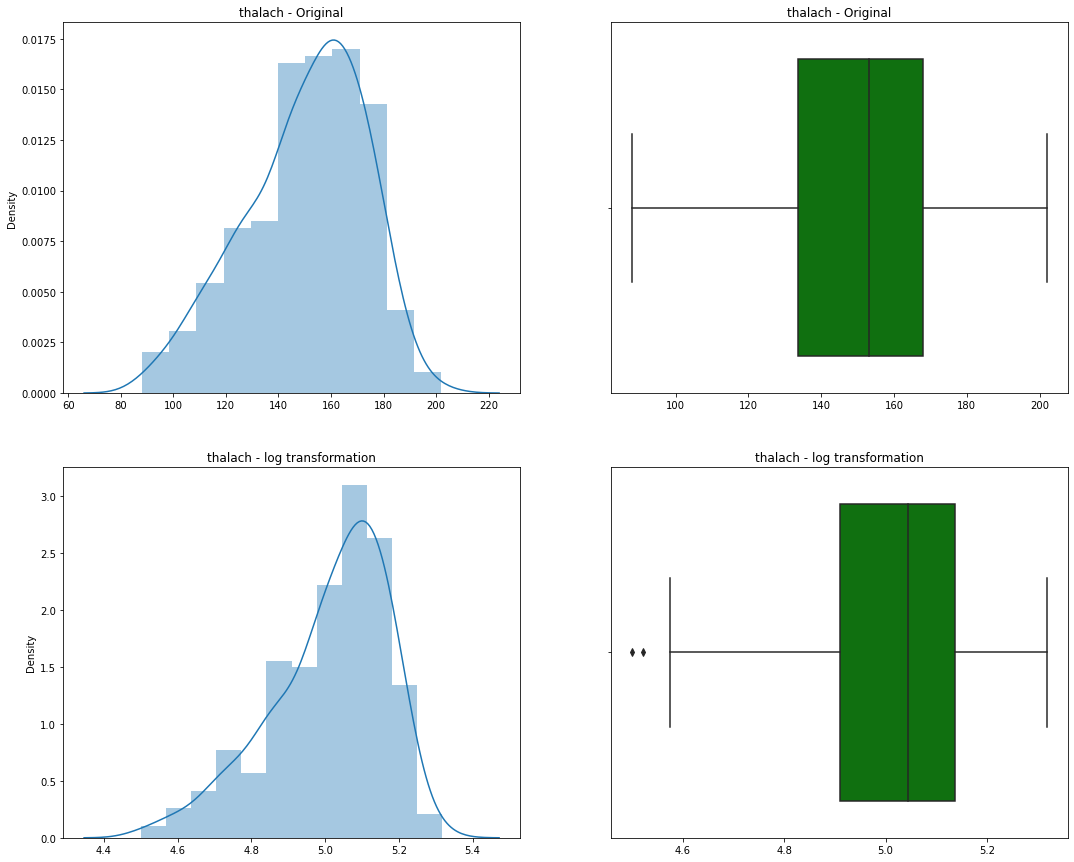

In [106]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(heart['thalach'],kde=True, ax=ax[0,0])
ax[0,0].set_title('thalach - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(heart['thalach'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('thalach - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(heart['thalach']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('thalach - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(heart['thalach']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('thalach - log transformation')
ax[1,1].set_xlabel('')

#### 5. Outliers Num Major Vessels

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

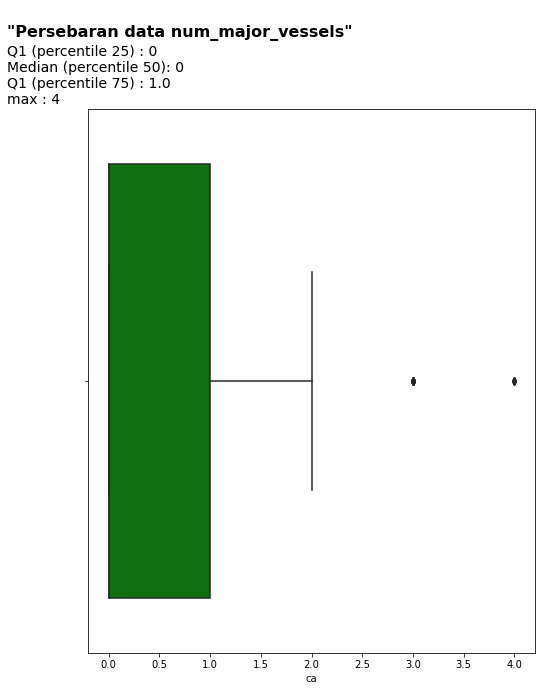

In [107]:
fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(heart['ca'],color='green',orient='h')

title = '''
"Persebaran data num_major_vessels"
'''
ax.text(-1,-0.6,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')

text = '''
Q1 (percentile 25) : 0
Median (percentile 50): 0
Q1 (percentile 75) : 1.0
max : 4

'''
ax.text(-1,-0.45,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.tight_layout

##### Log Transform num_major_vessels

In [108]:
Q1 = heart['ca'].quantile(0.25)
Q3 = heart['ca'].quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((heart['ca'] < (lower_range)) | (heart['ca'] > (upper_range))).sum()

Number of Outliers:


21

In [109]:
((((heart['ca'] < (lower_range)) | (heart['ca'] > (upper_range))).sum())/heart.shape[0])*100

7.394366197183098

In [110]:
print('Upper Range: {}\nLower Range:{}'.format(upper_range,lower_range))

Upper Range: 2.5
Lower Range:-1.5


In [111]:
Q1 = heart['ca'].quantile(0.25)
Q3 = heart['ca'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
High_limit = Q3 + (1.5 * IQR)
filtered_entries = ((heart['ca'] >= low_limit) & (heart['ca'] <= High_limit))
heart = heart[filtered_entries]

Text(0.5, 0, '')

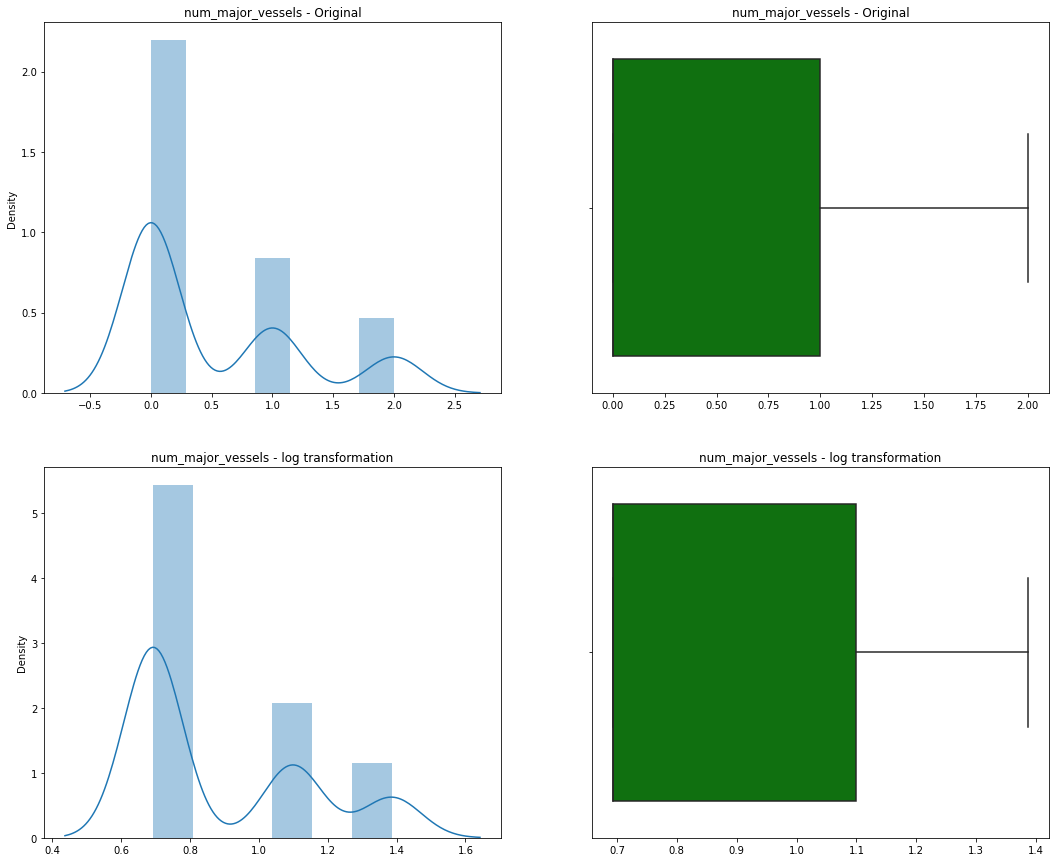

In [112]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(heart['ca'],kde=True, ax=ax[0,0])
ax[0,0].set_title('num_major_vessels - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(heart['ca'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('num_major_vessels - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(heart['ca']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('num_major_vessels - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(heart['ca']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('num_major_vessels - log transformation')
ax[1,1].set_xlabel('')

***all rows of data that originally had 302 rows, became 263 rows after removing outliers***

-------

-----

# Data Pre-Processing

-------

-----

# Feature Encoding

In Feature Encoding, we coded categorical variables with ***One Hot Encoding*** to make machine learning formulations apply the best accuracy

and, the column features that we do one hot encoding are ***sex, chest pain type, fasting blood sugar, rest ECG, exang, slope, and thalassemia***.

In [113]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          263 non-null    int64  
 1   sex          263 non-null    object 
 2   chest_pain   263 non-null    object 
 3   trestbps     263 non-null    int64  
 4   cholesterol  263 non-null    int64  
 5   fbs          263 non-null    object 
 6   rest_ecg     263 non-null    object 
 7   thalach      263 non-null    int64  
 8   exang        263 non-null    object 
 9   oldpeak      263 non-null    float64
 10  slope        263 non-null    object 
 11  ca           263 non-null    int64  
 12  thal         263 non-null    object 
 13  target       263 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 30.8+ KB


### One Hot Encoding

In [114]:
heart['sex'] = heart['sex'].fillna(heart['sex'].mode()[0])
dummies_Gender = pd.get_dummies(heart['sex'],prefix='sex')
heart = pd.concat([heart, dummies_Gender], axis=1)

heart['chest_pain'] = heart['chest_pain'].fillna(heart['chest_pain'].mode()[0])
dummies_CP = pd.get_dummies(heart['chest_pain'],prefix='chest_pain')
heart = pd.concat([heart, dummies_CP], axis=1)

heart['fbs'] = heart['fbs'].fillna(heart['fbs'].mode()[0])
dummies_FBS = pd.get_dummies(heart['fbs'],prefix='fbs')
heart = pd.concat([heart, dummies_FBS], axis=1)

heart['rest_ecg'] = heart['rest_ecg'].fillna(heart['rest_ecg'].mode()[0])
dummies_ECG = pd.get_dummies(heart['rest_ecg'],prefix='rest_ecg')
heart = pd.concat([heart, dummies_ECG], axis=1)

heart['slope'] = heart['slope'].fillna(heart['slope'].mode()[0])
dummies_SLOPE = pd.get_dummies(heart['slope'],prefix='slope')
heart = pd.concat([heart, dummies_SLOPE], axis=1)

heart['exang'] = heart['exang'].fillna(heart['exang'].mode()[0])
dummies_EXANG = pd.get_dummies(heart['exang'],prefix='exang')
heart = pd.concat([heart, dummies_EXANG], axis=1)

heart['thal'] = heart['thal'].fillna(heart['thal'].mode()[0])
dummies_THAL = pd.get_dummies(heart['thal'],prefix='thal')
heart = pd.concat([heart, dummies_THAL], axis=1)

In [115]:
heart.info()
heart.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 302
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    263 non-null    int64  
 1   sex                                    263 non-null    object 
 2   chest_pain                             263 non-null    object 
 3   trestbps                               263 non-null    int64  
 4   cholesterol                            263 non-null    int64  
 5   fbs                                    263 non-null    object 
 6   rest_ecg                               263 non-null    object 
 7   thalach                                263 non-null    int64  
 8   exang                                  263 non-null    object 
 9   oldpeak                                263 non-null    float64
 10  slope                                  263 non-null    object 
 11  ca    

Index(['age', 'sex', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target', 'sex_female', 'sex_male', 'chest_pain_asymptomatic',
       'chest_pain_atypical angina', 'chest_pain_non-anginal pain',
       'chest_pain_typical angina', 'fbs_high', 'fbs_low',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'slope_downsloping', 'slope_flat', 'slope_upsloping', 'exang_no',
       'exang_yes', 'thal_fixed defect', 'thal_normal', 'thal_null',
       'thal_reversable defect'],
      dtype='object')

***all columns of data that originally had 14 column, became 34 column after feature engineering / encoding***

----

----

# Feature Selection

Removed some unnecessary features

In [116]:
heart.drop(['sex','chest_pain', 'fbs', 'rest_ecg', 'exang','slope', 'thal'], axis=1,inplace=True)
heart.head(5)

age  trestbps  cholesterol  thalach  oldpeak  ca  target  sex_female  \
0   63       145          233      150      2.3   0       1           0   
1   37       130          250      187      3.5   0       1           0   
2   41       130          204      172      1.4   0       1           1   
3   56       120          236      178      0.8   0       1           0   
4   57       120          354      163      0.6   0       1           1   

   sex_male  chest_pain_asymptomatic  ...  rest_ecg_normal  slope_downsloping  \
0         1                        1  ...                1                  0   
1         1                        0  ...                0                  0   
2         0                        0  ...                1                  1   
3         1                        0  ...                0                  1   
4         0                        0  ...                0                  1   

   slope_flat  slope_upsloping  exang_no  exang_yes  thal_fixed defect  \
0           0                1         1          0                  0   
1           0                1         1          0                  1   
2           0                0         1          0                  1   
3           0                0         1          0                  1   
4           0                0         0          1                  1   

   thal_normal  thal_null  thal_reversable defect  
0            1          0                       0  
1            0          0                       0  
2            0          0                       0  
3            0          0                       0  
4            0          0                       0  

[5 rows x 27 columns]

In [117]:
heart.shape, heart.columns

((263, 27),
 Index(['age', 'trestbps', 'cholesterol', 'thalach', 'oldpeak', 'ca', 'target',
        'sex_female', 'sex_male', 'chest_pain_asymptomatic',
        'chest_pain_atypical angina', 'chest_pain_non-anginal pain',
        'chest_pain_typical angina', 'fbs_high', 'fbs_low',
        'rest_ecg_ST-T wave abnormality',
        'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
        'slope_downsloping', 'slope_flat', 'slope_upsloping', 'exang_no',
        'exang_yes', 'thal_fixed defect', 'thal_normal', 'thal_null',
        'thal_reversable defect'],
       dtype='object'))

In [118]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 302
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    263 non-null    int64  
 1   trestbps                               263 non-null    int64  
 2   cholesterol                            263 non-null    int64  
 3   thalach                                263 non-null    int64  
 4   oldpeak                                263 non-null    float64
 5   ca                                     263 non-null    int64  
 6   target                                 263 non-null    int64  
 7   sex_female                             263 non-null    uint8  
 8   sex_male                               263 non-null    uint8  
 9   chest_pain_asymptomatic                263 non-null    uint8  
 10  chest_pain_atypical angina             263 non-null    uint8  
 11  chest_

-----------------

-----------------

# Modelling

-----------------

### Train test split

-----------------

In [119]:
data_train = heart.iloc[:263,]
data_test = heart.iloc[:263,]

In [120]:
data_train.shape, data_test.shape

((263, 27), (263, 27))

***Splitting the dataset into train and test datasets, 80% Train Data + 20% Test Data***

In [121]:
X = data_train.drop(['target'],axis=1)
y = data_test['target']
              
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'], test_size = .2)

-----------------

### Machine Learning Model

Model Machine Learning using ****Logistic Regression ,K-Nearest Neighbors , Support Vector Classifier, Naive Bayes, Desicion Tree, and Random Foresst**** to formulation the Machine learning modelling scores to fit with Heart Disease patient data

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


def models(models):
  results = pd.DataFrame({'accuracy_train':[],'accuracy_test':[],
                          'recall_train':[], 'recall_test':[],
                          'precision_train':[],'precision_test':[],
                          'AUC_train': [], 'AUC_test': [], 
                          'f1_score_train':[], 'f1_score_test':[]})
  

  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    #auc_score_train = auc(fpr, tpr)
    results = results.append({'accuracy_train': accuracy_score(y_train, model.predict(X_train)),
                              'accuracy_test': accuracy_score(y_test, model.predict(X_test)),
                              'recall_train': recall_score(y_train, model.predict(X_train), average='macro'),
                              'recall_test': recall_score(y_test, model.predict(X_test), average='macro'),
                              'precision_train': precision_score(y_train, model.predict(X_train), average='macro'),
                              'precision_test': precision_score(y_test, model.predict(X_test), average='macro'),
                              'AUC_train': roc_auc_score(y_train, model.predict(X_train)),
                              'AUC_test': roc_auc_score(y_test, model.predict(X_test)),
                              'f1_score_train': metrics.f1_score(y_train, model.predict(X_train)),
                              'f1_score_test':  metrics.f1_score(y_test, model.predict(X_test))
                              }, ignore_index=True)
    

   
  
  results['model'] = ['Logistic Regression', 'KNN','SVM','Naive Bayes', 'Decision Tree', 'Random Forest']
  return results

In [124]:
models([LogisticRegression(), KNeighborsClassifier(), SVC(),GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()])

accuracy_train  accuracy_test  recall_train  recall_test  precision_train  \
0        0.861905       0.849057      0.854880     0.859091         0.863095   
1        0.742857       0.698113      0.734324     0.688636         0.738824   
2        0.642857       0.698113      0.599548     0.619697         0.680147   
3        0.819048       0.811321      0.817065     0.828788         0.815550   
4        1.000000       0.830189      1.000000     0.843939         1.000000   
5        1.000000       0.849057      1.000000     0.859091         1.000000   

   precision_test  AUC_train  AUC_test  f1_score_train  f1_score_test  \
0        0.840517   0.854880  0.859091        0.881633       0.870968   
1        0.682551   0.734324  0.688636        0.778689       0.750000   
2        0.719444   0.599548  0.619697        0.745763       0.794872   
3        0.809117   0.817065  0.828788        0.838983       0.833333   
4        0.824286   1.000000  0.843939        1.000000       0.852459   
5        0.840517   1.000000  0.859091        1.000000       0.870968   

                 model  
0  Logistic Regression  
1                  KNN  
2                  SVM  
3          Naive Bayes  
4        Decision Tree  
5        Random Forest

the machine learning model with ***Random Forest and Decision Tree Algorithm***  had a significant Accuracy score. For further evaluation, the researcher used the ***Random Forest*** model to advance evaluation

---

### Evaluation

In [125]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

##### Cross Validation

In [132]:
scores = cross_val_score(rf, X_train, y_train, cv=6)
print('Cross-Validation Accuracy Scores', scores)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores [0.97142857 0.82857143 0.85714286 0.82857143 0.65714286 0.91428571]
Cross-Validation Accuracy Scores 0.842857142857143


***Cross-Validation Accuracy Scores is 0.8428 or 84.2 %***

##### Hyperparamater Tuning

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
%timeit

param_grid = [
{'criterion':['gini', 'entropy'],'n_estimators': [15, 20, 25], 'max_features': ['auto', 'log2'], 
'max_depth': [5, 10, 15],
'min_samples_split':[2, 5, 10], 'min_samples_leaf':[3, 6, 9], 'bootstrap': [True, False]}
 ]

rf = RandomForestClassifier(random_state=10)

grid_search_forest = GridSearchCV(rf, param_grid, cv=6)
grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=5, max_features='log2',
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=25, random_state=10)

##### after tuning hyperparameter

In [134]:
rf = RandomForestClassifier( bootstrap=False, max_depth=5, max_features='log2',
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=25, random_state=10)

rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[19  1]
 [ 6 27]]


Accuracy of Random Forest: 86.79245283018868 

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.96      0.82      0.89        33

    accuracy                           0.87        53
   macro avg       0.86      0.88      0.86        53
weighted avg       0.89      0.87      0.87        53



*After Hyperparameter tuning accuracy value* ***Random Forest*** *Algorithm is 86,79 %*

-----

## Feature Importance

Text(0.5, 1.0, 'feature importance score')

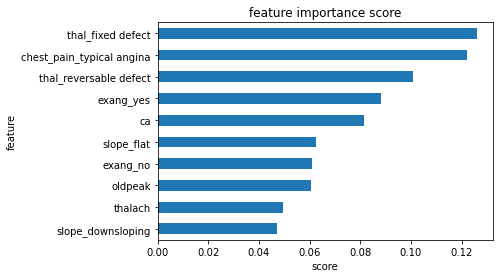

In [135]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Most 5 Feature Importance that affect heart disease including: 

- thal fixed defect 
- Chest Pain: Typical Angina
- thal reversable defect
- Exang: Yes
- CA (Major Blood Vessels)

-----------------

## Permutation Importance

In [136]:
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(grid_search_forest.best_estimator_, random_state=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.to_list())

The table above is an influential feature in the experiment, author found influential feature that causes heart disease, including:
- CA ( Major Blood Vessels)
- Chest Pain: Typical Angina
- Slope Flat
- oldpeak
- Thal Fixed Defect
- Exang: Yes
- Cholesterol
- Thalach
- Thal Reversable Defect

-----------------

## Random Forest tree classifier

In [137]:
from sklearn.tree import export_graphviz
estimator = grid_search_forest.best_estimator_[10]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['no disease','disease'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

----

## SHAP (Shapley Additive explanation)

SHAP is for gaining insight from our Machine Learning model. If the above algorithm talks in full how each feature affects the performance of the model, SHAP is more specific in taking into account how each specific feature affects each prediction made.

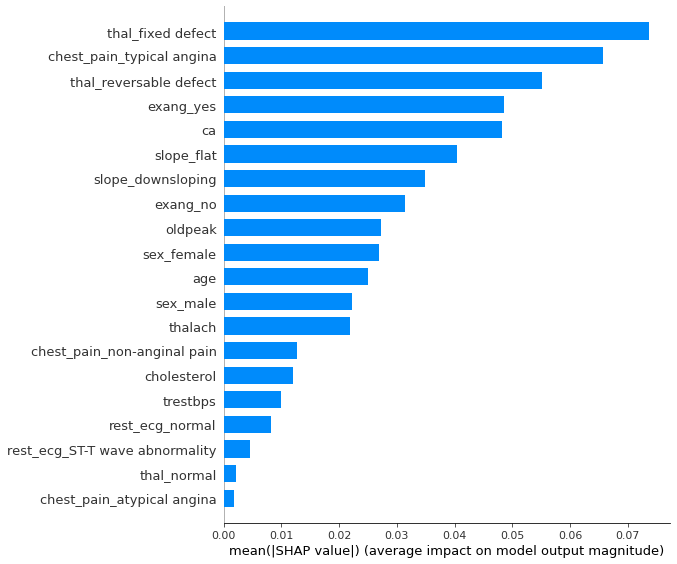

In [138]:
import shap 
feature_names = X.columns.values.tolist()
X_test_df = pd.DataFrame(data=X_test, columns=feature_names)

explainer = shap.TreeExplainer(grid_search_forest.best_estimator_)
shap_values = explainer.shap_values(X_test_df)

shap.summary_plot(shap_values[1], X_test_df, plot_type="bar")

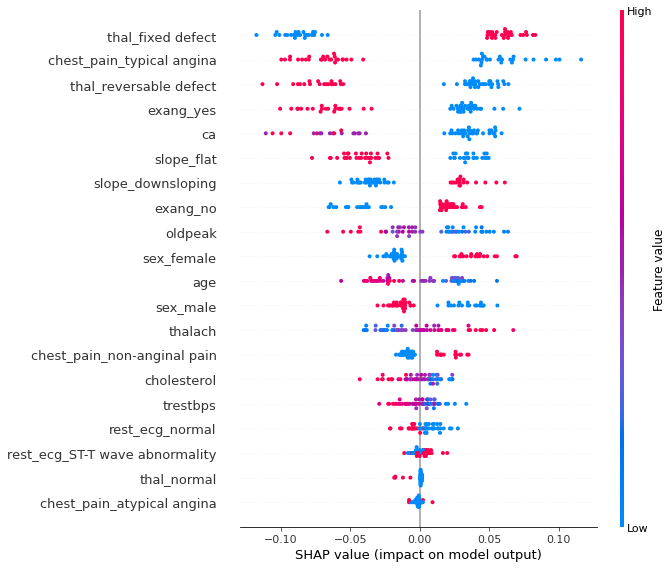

In [139]:
shap.summary_plot(shap_values[1], X_test_df)

As clearly seen in the above shap summary,

- Low value(blue on right) of chest pain typical angina leads to higher probability of heart disease
- Same is for number of CA , Thal Reversable defect and Exang:Yes.
- The opposite is for Thal Fixed Defect





Let's see how different variables affect prediction for individual patients

In [140]:
def plot_shap(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [141]:
patient = X_test_df.iloc[1,:].astype(float)
plot_shap(grid_search_forest.best_estimator_, patient)

In [142]:
patient = X_test_df.iloc[2,:].astype(float)
plot_shap(grid_search_forest.best_estimator_, patient)

In [143]:
patient = X_test_df.iloc[5,:].astype(float)
plot_shap(grid_search_forest.best_estimator_, patient)

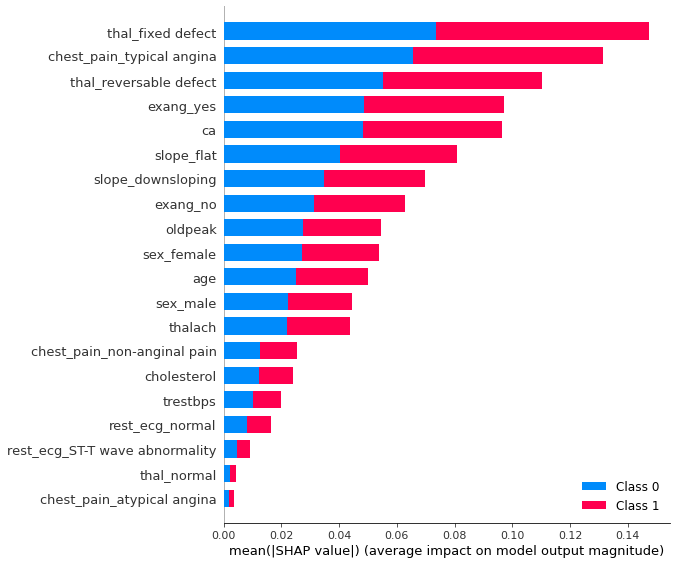

In [144]:
shap_val = explainer.shap_values(X_test)
shap.summary_plot(shap_val, X_test)

In the bar plot above, **CA(major blood vessels), Chest Pain: Typical Angina, Thal (thalassemia) and Exang: Yes** is the most contributing feature to distinguish a class. 

it's now clear that value of **CA(major blood vessels), Chest Pain: Typical Angina, Thal (thalassemia) and Exang: Yes** causes high risk of Heart disease

### SHAP Explainer

**Disease (Red)** vs **No disease (Blue)** for 50 patients

We can hover over the data below to get information for each patient

In [145]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_df.iloc[:50])

------

------

# Summary

The results of research conducted to predict heart disease and its causes. from the modeling carried out including *Logistic Regression, Naive Bayes, Support Vector Machine, K-Nearest Neighbors, Decision Tree ,and Random Forest*. The modeling results above show that ***Random Forest*** has the most significant accuracy  of all the modeling algorithms carried out. Next, the authors carry out further evaluations using ***Random Forest*** with hyperparameter instrument <i>Random state: 10 ,Cross Validation: 6 Folds, max depht: 5, max feature: log2, sample leaf: 3, sample split: 10 and estimators: 25<i> The Accuracy increase <b>86,79 %<b>.

in predicting and knowing the cause of heart disease by the existing sample data with using the ***Permutation Importance and SHAP*** methods, conclusion from the entire sample it shows ***CA(major blood vessels), Chest Pain: Typical Angina, Thal (thalassemia fixed and reversable defect) and Exang: Yes*** which are influential factors causing heart disease.

<i>For recommendations of the 5 influential variables, a cardiologist should diagnose these variables early so that the treatment of heart disease patients is more effective and efficient.<i>

------

------